<a href="https://colab.research.google.com/github/debmalyabasak/debmalyabasak.github.io/blob/main/GaussainSums-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter a large value for X: 100
Enter the real part of s: 1
Enter the imaginary part of s: 0


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

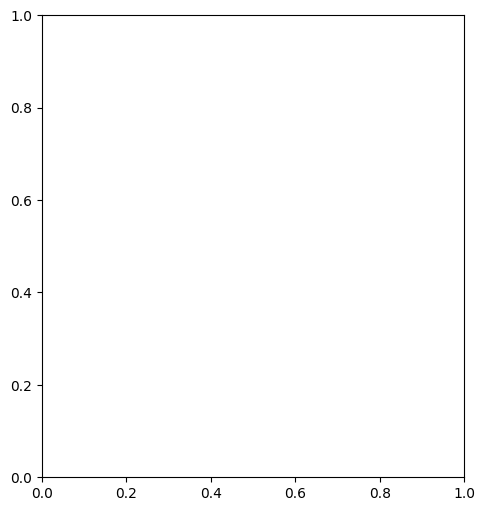

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol  # Updated import

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
s_real = float(input("Enter the real part of s: "))
s_imag = float(input("Enter the imaginary part of s: "))
s = complex(s_real, s_imag)
K = int(np.log(X)**10)

# Generate primes in the range [X, 2X]
primes = list(sympy.primerange(X, 2 * X))

# Compute V_p for each prime p
V_real = []
V_imag = []

for p in primes:
    V_real_p = 0
    V_imag_p = 0
    for k in range(1, K + 1):
        legendre = legendre_symbol(k, p)
        theta = -s.imag * np.log(k)  # Extract the imaginary part of s
        magnitude = k ** (-s.real)  # Extract the real part of s
        V_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
        V_imag_p += legendre * magnitude * np.sin(theta)  # Imaginary part: sum of sines
    V_real.append(V_real_p)
    V_imag.append(V_imag_p)

# Analyze the distributions
plt.figure(figsize=(12, 6))

# Histogram for Re(V_p)
plt.subplot(1, 2, 1)
plt.hist(V_real, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribution of Re(V_p)")
plt.xlabel("Re(V_p)")
plt.ylabel("Frequency")

# Histogram for Im(V_p)
plt.subplot(1, 2, 2)
plt.hist(V_imag, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribution of Im(V_p)")
plt.xlabel("Im(V_p)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Optional: Output basic statistics
print("Basic Statistics for Re(V_p):")
print(f"Mean: {np.mean(V_real):.4f}, Std Dev: {np.std(V_real):.4f}")
print()
print("Basic Statistics for Im(V_p):")
print(f"Mean: {np.mean(V_imag):.4f}, Std Dev: {np.std(V_imag):.4f}")


Enter a large value for X: 1000000
Enter values for s_1:
  Real part of s_1: 0
  Imaginary part of s_1: 0
Enter values for s_2:
  Real part of s_2: 1
  Imaginary part of s_2: 10
Enter values for s_3:
  Real part of s_3: 2
  Imaginary part of s_3: 25
Enter values for s_4:
  Real part of s_4: 3
  Imaginary part of s_4: 5
Enter values for s_5:
  Real part of s_5: -1
  Imaginary part of s_5: 18
Number of primes in the range [1000000, 2000000]: 70435

Processing for s_1 = 0j...


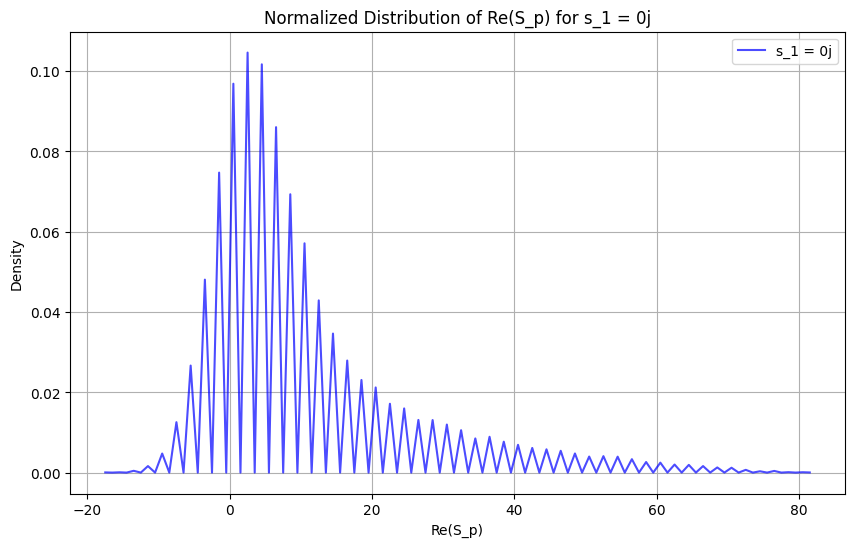

Mean of Re(S_p) for s_1: 9.957237169021083
Standard deviation of Re(S_p) for s_1: 14.361978229356533

Processing for s_2 = (1+10j)...


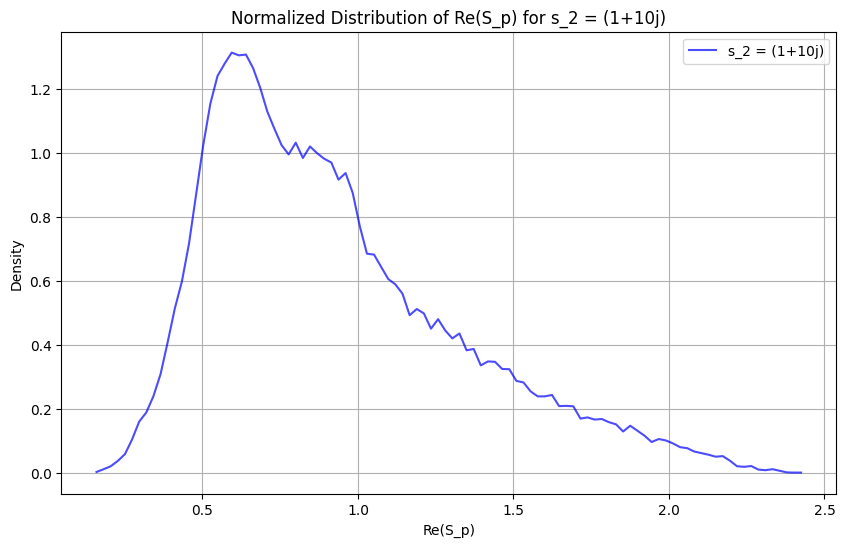

Mean of Re(S_p) for s_2: 0.9263018713430997
Standard deviation of Re(S_p) for s_2: 0.404297660845649

Processing for s_3 = (2+25j)...


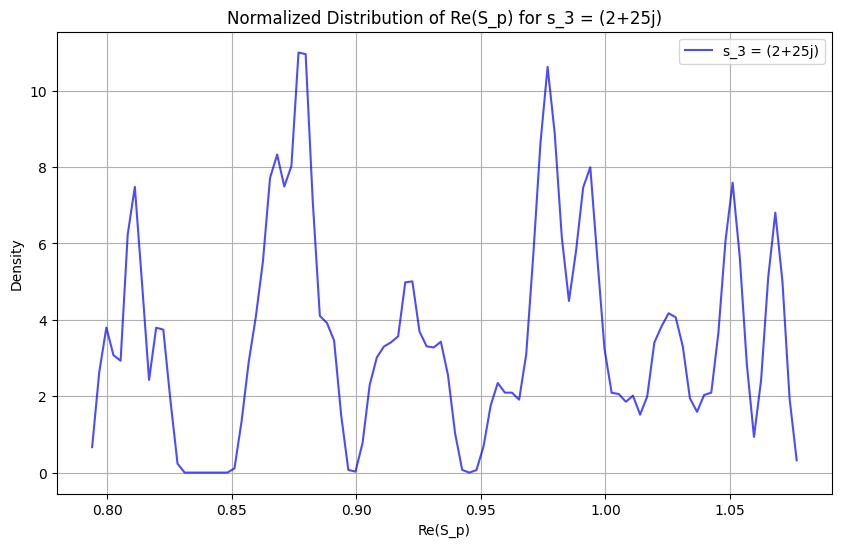

Mean of Re(S_p) for s_3: 0.940635075009976
Standard deviation of Re(S_p) for s_3: 0.0802294854922164

Processing for s_4 = (3+5j)...


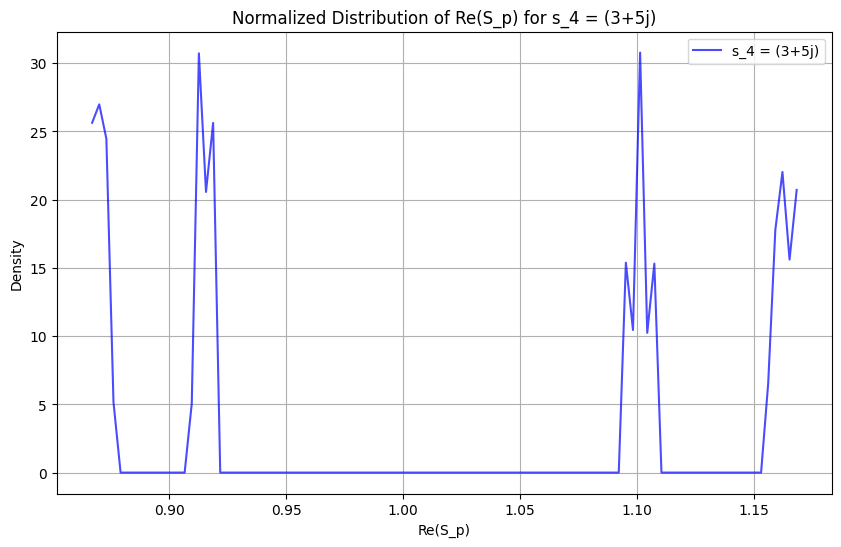

Mean of Re(S_p) for s_4: 1.0127253512293646
Standard deviation of Re(S_p) for s_4: 0.12275027730543281

Processing for s_5 = (-1+18j)...


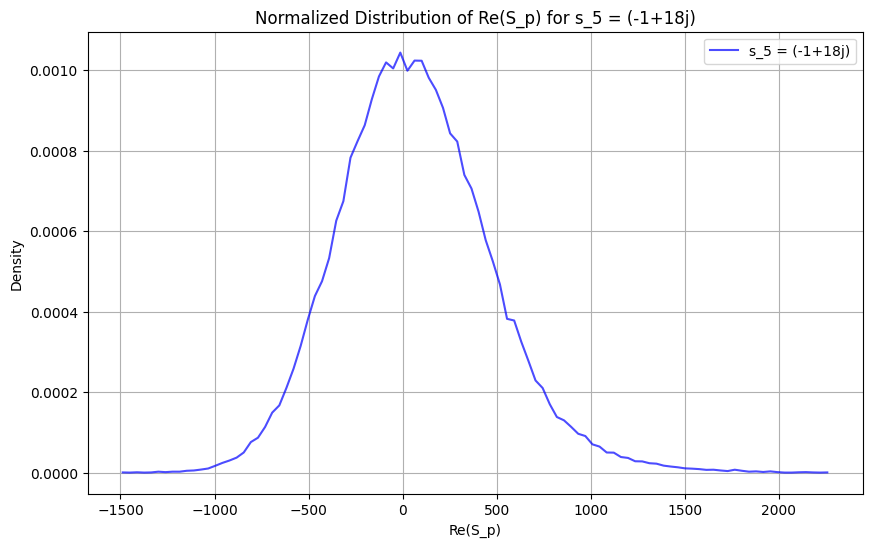

Mean of Re(S_p) for s_5: 67.40651614692524
Standard deviation of Re(S_p) for s_5: 404.19887605891114


In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol  # Updated import

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
K = 100

# Allow the user to input 5 s values
s_values = []
for i in range(1, 6):
    print(f"Enter values for s_{i}:")
    s_real = float(input(f"  Real part of s_{i}: "))
    s_imag = float(input(f"  Imaginary part of s_{i}: "))
    s_values.append(complex(s_real, s_imag))

# Generate all primes in the range [X, 2X]
all_primes = list(sympy.primerange(X, 2 * X))
num_primes = len(all_primes)

if num_primes == 0:
    print(f"No primes found in the range [{X}, {2 * X}].")
    exit()

print(f"Number of primes in the range [{X}, {2 * X}]: {num_primes}")

# Compute and plot for each s value
for idx, s in enumerate(s_values, 1):
    print(f"\nProcessing for s_{idx} = {s}...")

    # Compute S_p for each prime p
    S_real = []  # Store the real part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        S_real.append(S_real_p)

    # Ensure all elements in S_real are floats
    S_real_float = []
    for val in S_real:
        try:
            S_real_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value: {val}")

    # Convert to NumPy array for further processing
    S_real_float = np.array(S_real_float)

    # Filter out invalid (non-finite) values
    finite_S_real = S_real_float[np.isfinite(S_real_float)]

    # Check if there are any valid values to plot
    if len(finite_S_real) == 0:
        print(f"No valid data to plot for s_{idx}.")
        continue

    # Normalize the histogram data
    density, bins = np.histogram(finite_S_real, bins=100, density=True)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    # Plot histogram of the real part of S_p
    plt.figure(figsize=(10, 6))
    plt.plot(bin_centers, density, color='blue', alpha=0.7, label=f's_{idx} = {s}')
    plt.title(f"Normalized Distribution of Re(S_p) for s_{idx} = {s}")
    plt.xlabel("Re(S_p)")
    plt.ylabel("Density")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Basic statistical analysis
    mean_real = np.mean(finite_S_real)
    std_real = np.std(finite_S_real)
    print(f"Mean of Re(S_p) for s_{idx}: {mean_real}")
    print(f"Standard deviation of Re(S_p) for s_{idx}: {std_real}")


Enter a large value for X: 1000000
Enter the real part of s1: 0
Enter the imaginary part of s1: 11
Enter the real part of s2: -1
Enter the imaginary part of s2: 23
Enter the real part of s3: 1
Enter the imaginary part of s3: 7
Enter the real part of s4: 2
Enter the imaginary part of s4: 13
Enter the real part of s5: 5
Enter the imaginary part of s5: -17
Number of primes in the range [1000000, 2000000]: 70435


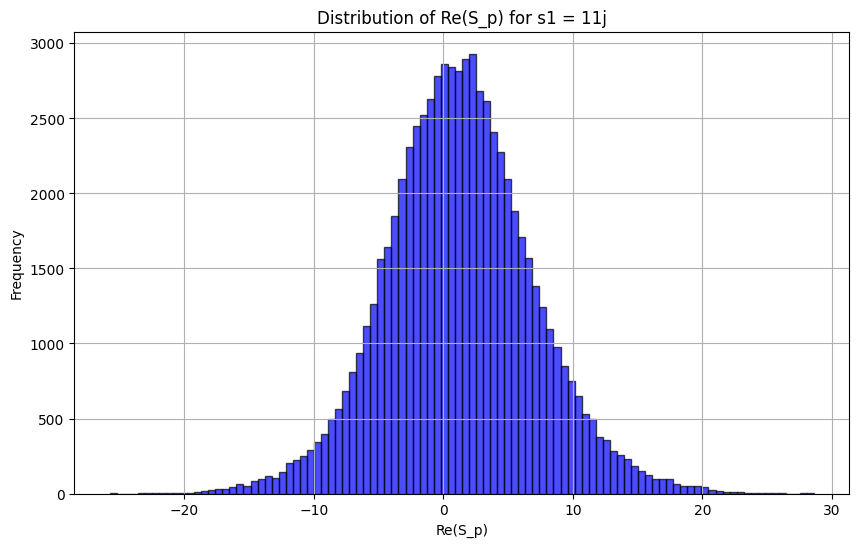

Mean of Re(S_p) for s1: 1.2185134276326655
Standard deviation of Re(S_p) for s1: 5.714975072980937


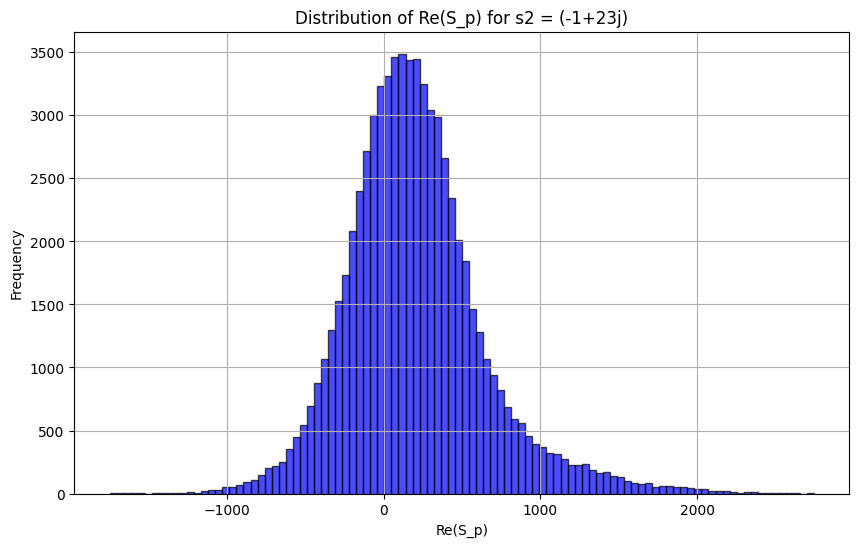

Mean of Re(S_p) for s2: 199.0120611846648
Standard deviation of Re(S_p) for s2: 443.78238872308793


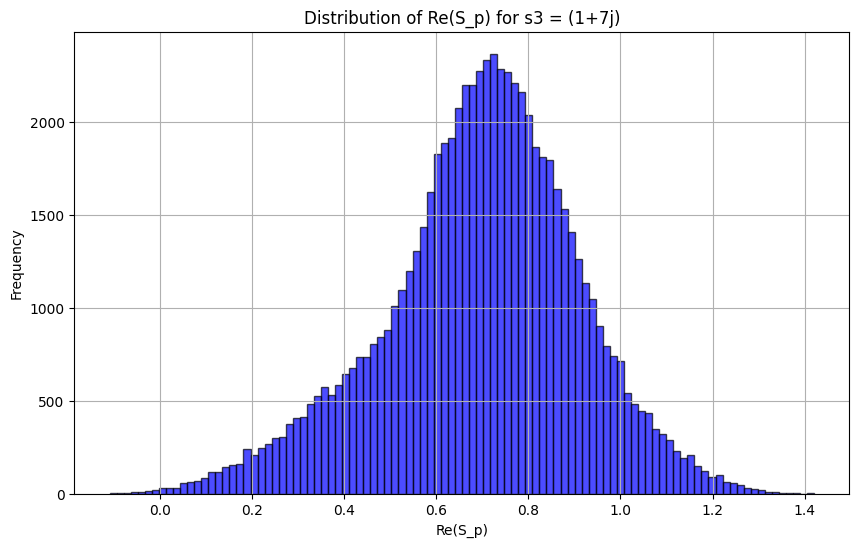

Mean of Re(S_p) for s3: 0.6962029541682684
Standard deviation of Re(S_p) for s3: 0.21226283331923973


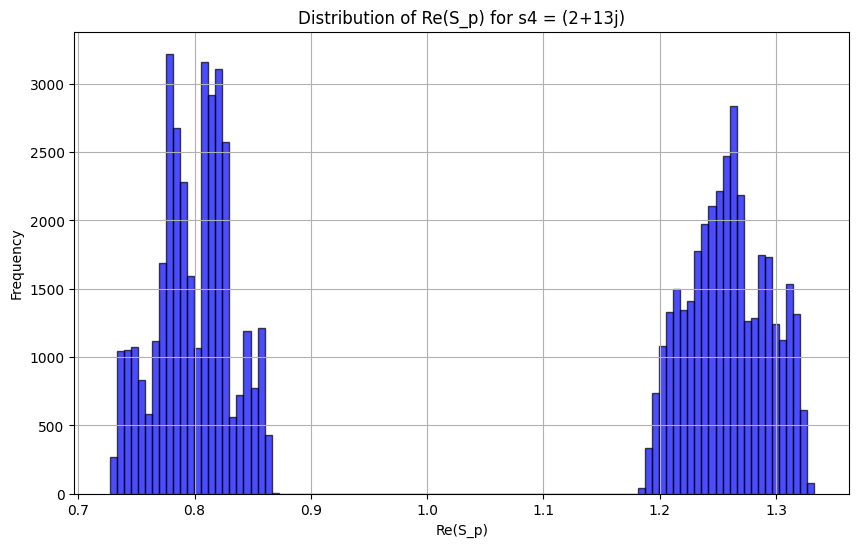

Mean of Re(S_p) for s4: 1.0293183283685217
Standard deviation of Re(S_p) for s4: 0.23243932110340626


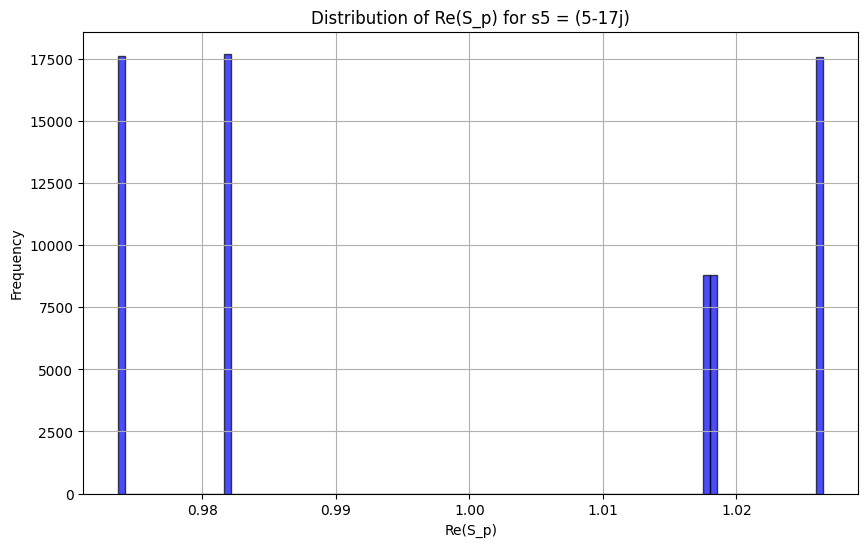

Mean of Re(S_p) for s5: 0.9999805505714592
Standard deviation of Re(S_p) for s5: 0.022491169016435695


In [2]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol  # Updated import

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
K = 100

# Prompt user for 5 different \( s \)-values
s_values = []
for i in range(1, 6):
    s_real = float(input(f"Enter the real part of s{i}: "))
    s_imag = float(input(f"Enter the imaginary part of s{i}: "))
    s_values.append(complex(s_real, s_imag))

# Generate all primes in the range [X, 2X]
all_primes = list(sympy.primerange(X, 2 * X))
num_primes = len(all_primes)

if num_primes == 0:
    print(f"No primes found in the range [{X}, {2 * X}].")
    exit()

print(f"Number of primes in the range [{X}, {2 * X}]: {num_primes}")

# Function to compute S_p for a given s
def compute_S_p(s):
    S_real = []  # Store the real part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        S_real.append(S_real_p)

    # Ensure all elements in S_real are floats
    S_real_float = []
    for val in S_real:
        try:
            S_real_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value: {val}")

    # Convert to NumPy array for further processing
    S_real_float = np.array(S_real_float)

    # Filter out invalid (non-finite) values
    finite_S_real = S_real_float[np.isfinite(S_real_float)]

    return finite_S_real

# Compute S_p and plot for each s value
for idx, s in enumerate(s_values, start=1):
    finite_S_real = compute_S_p(s)

    if len(finite_S_real) == 0:
        print(f"No valid data to plot for s{idx} = {s}.")
    else:
        # Plot histogram of the real part of S_p for the current s
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Re(S_p) for s{idx} = {s}")
        plt.xlabel("Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Re(S_p) for s{idx}: {mean_real}")
        print(f"Standard deviation of Re(S_p) for s{idx}: {std_real}")


Enter a large value for X: 1000000
Enter the real part of s1: 3
Enter the imaginary part of s1: 0
Enter the real part of s2: 3
Enter the imaginary part of s2: 11
Enter the real part of s3: 3
Enter the imaginary part of s3: -17
Enter the real part of s4: 4
Enter the imaginary part of s4: 5
Enter the real part of s5: 5
Enter the imaginary part of s5: 0
Number of primes in the range [1000000, 2000000]: 70435


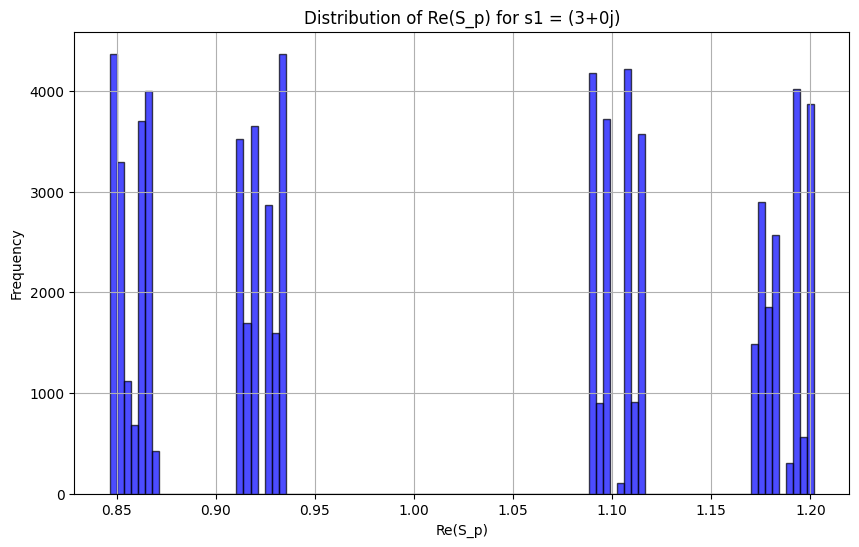

Mean of Re(S_p) for s1: 1.0171093850344441
Standard deviation of Re(S_p) for s1: 0.13290655604179336


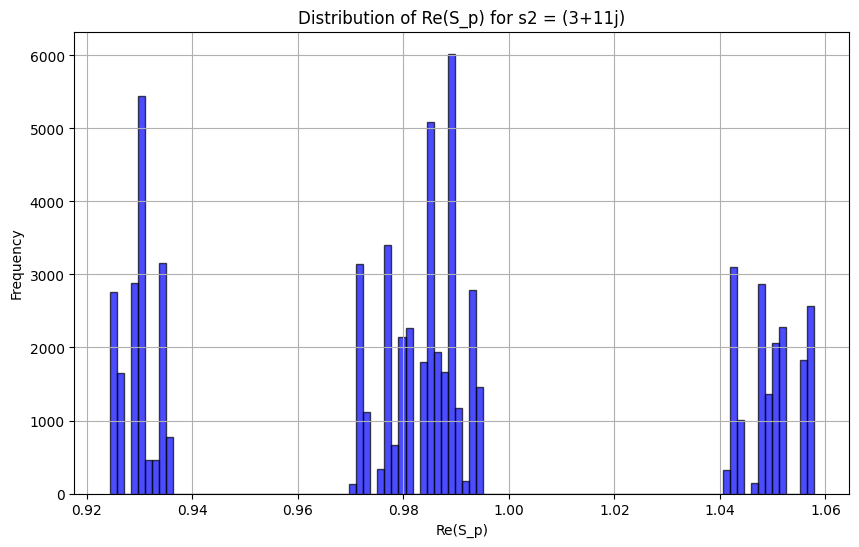

Mean of Re(S_p) for s2: 0.9868441494544334
Standard deviation of Re(S_p) for s2: 0.04273712210241045


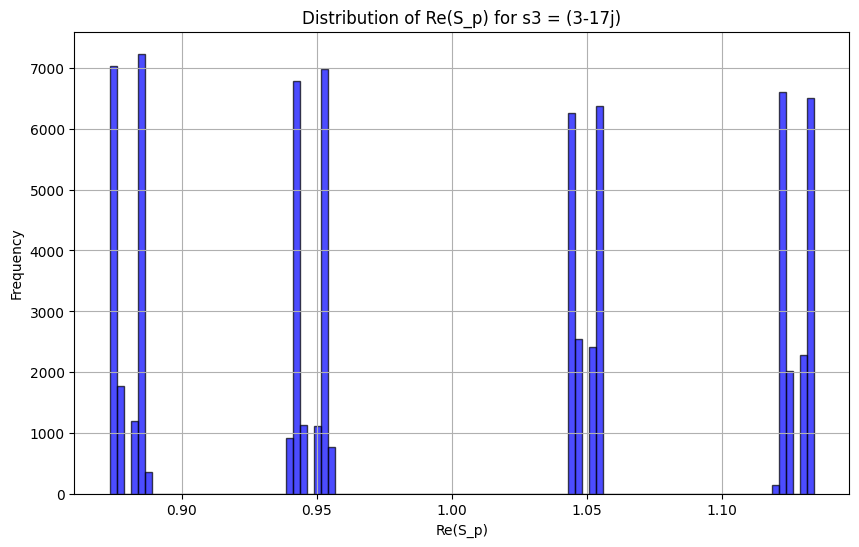

Mean of Re(S_p) for s3: 1.0009507605999612
Standard deviation of Re(S_p) for s3: 0.09466228045907758


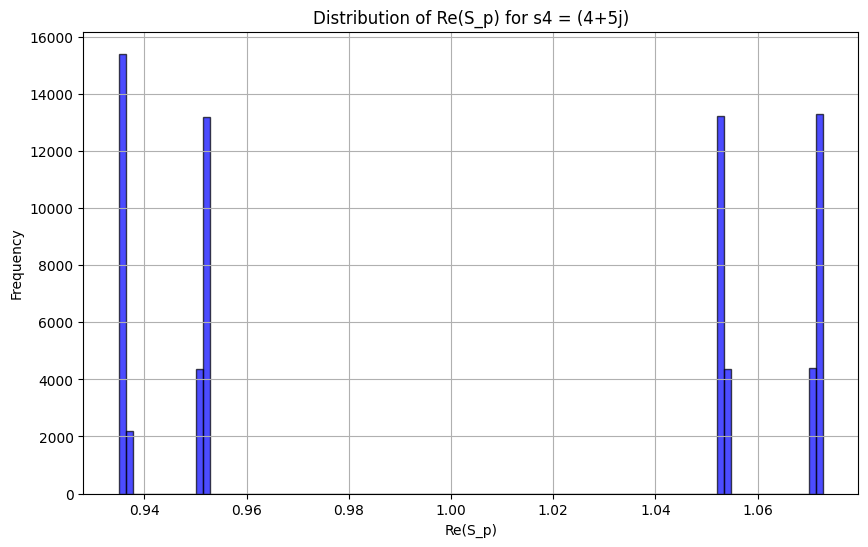

Mean of Re(S_p) for s4: 1.0032369357913655
Standard deviation of Re(S_p) for s4: 0.060052312537674644


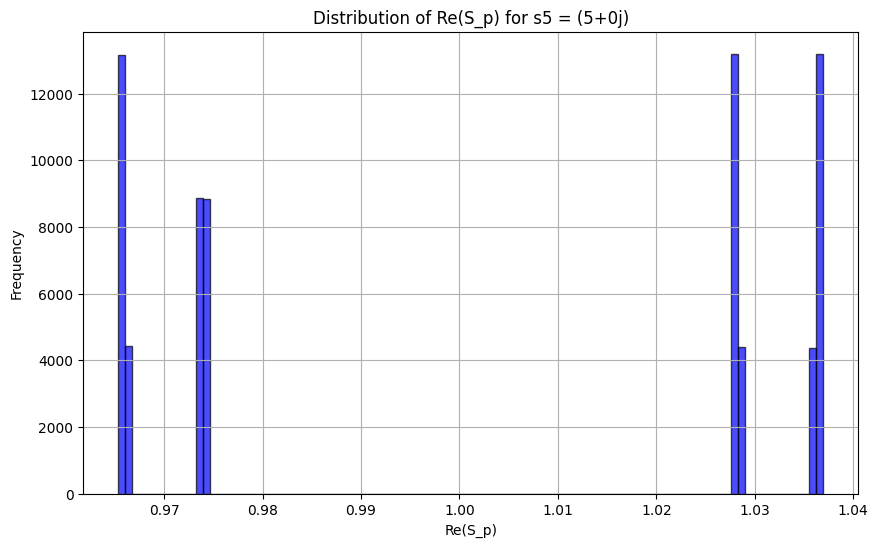

Mean of Re(S_p) for s5: 1.0009373404793032
Standard deviation of Re(S_p) for s5: 0.03154297329290875


In [3]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol  # Updated import

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
K = 100

# Prompt user for 5 different \( s \)-values
s_values = []
for i in range(1, 6):
    s_real = float(input(f"Enter the real part of s{i}: "))
    s_imag = float(input(f"Enter the imaginary part of s{i}: "))
    s_values.append(complex(s_real, s_imag))

# Generate all primes in the range [X, 2X]
all_primes = list(sympy.primerange(X, 2 * X))
num_primes = len(all_primes)

if num_primes == 0:
    print(f"No primes found in the range [{X}, {2 * X}].")
    exit()

print(f"Number of primes in the range [{X}, {2 * X}]: {num_primes}")

# Function to compute S_p for a given s
def compute_S_p(s):
    S_real = []  # Store the real part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        S_real.append(S_real_p)

    # Ensure all elements in S_real are floats
    S_real_float = []
    for val in S_real:
        try:
            S_real_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value: {val}")

    # Convert to NumPy array for further processing
    S_real_float = np.array(S_real_float)

    # Filter out invalid (non-finite) values
    finite_S_real = S_real_float[np.isfinite(S_real_float)]

    return finite_S_real

# Compute S_p and plot for each s value
for idx, s in enumerate(s_values, start=1):
    finite_S_real = compute_S_p(s)

    if len(finite_S_real) == 0:
        print(f"No valid data to plot for s{idx} = {s}.")
    else:
        # Plot histogram of the real part of S_p for the current s
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Re(S_p) for s{idx} = {s}")
        plt.xlabel("Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Re(S_p) for s{idx}: {mean_real}")
        print(f"Standard deviation of Re(S_p) for s{idx}: {std_real}")


Enter a large value for X: 1000000
Enter the real part of s: 0
Generated s-values:
s1 = 8j
s2 = -16j
s3 = 2j
s4 = 14j
s5 = -3j
s6 = -1j
s7 = -19j
s8 = 5j
s9 = 10j
s10 = 0j
Number of primes in the range [1000000, 2000000]: 70435


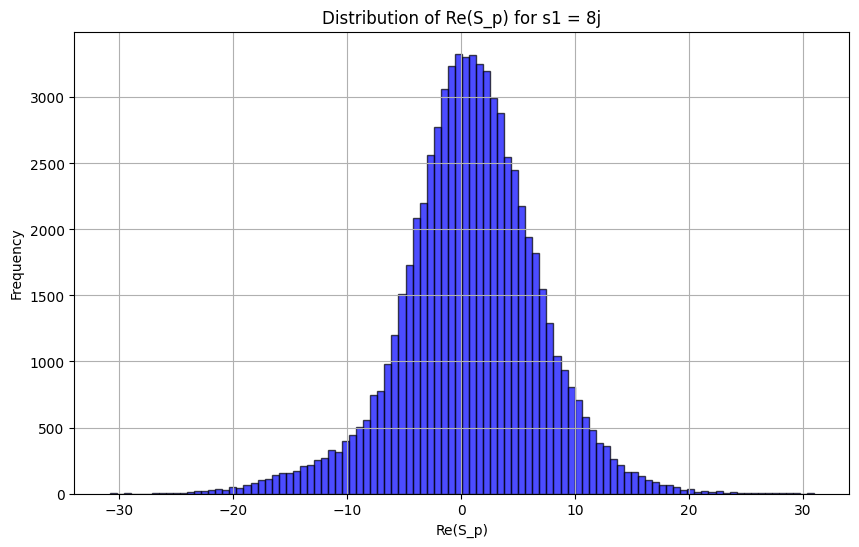

Mean of Re(S_p) for s1: 0.7965960233734434
Standard deviation of Re(S_p) for s1: 6.033162772581208


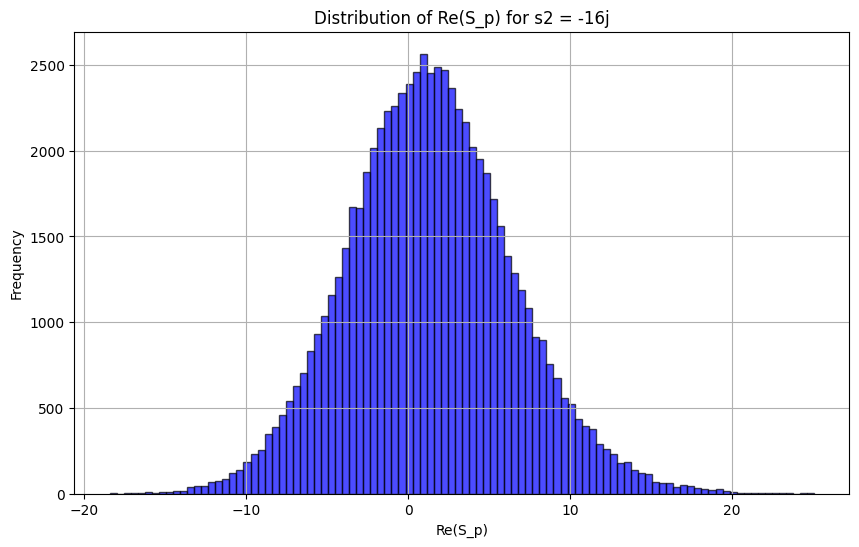

Mean of Re(S_p) for s2: 1.3718365373744466
Standard deviation of Re(S_p) for s2: 5.103187575971034


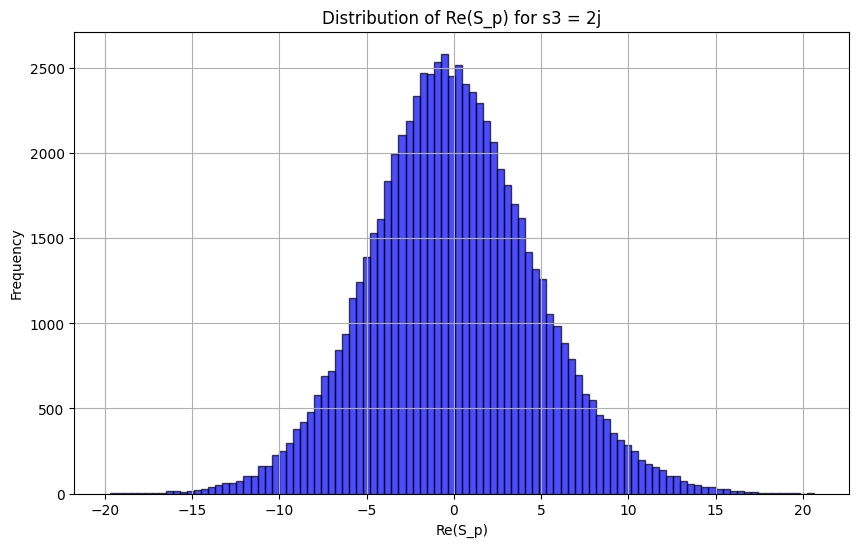

Mean of Re(S_p) for s3: -0.04287873049818195
Standard deviation of Re(S_p) for s3: 4.739411327172158


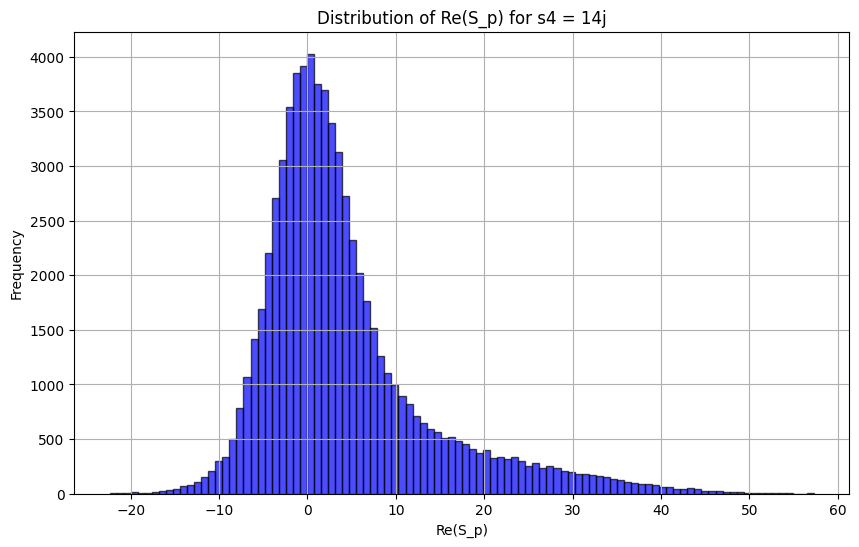

Mean of Re(S_p) for s4: 4.138087123081378
Standard deviation of Re(S_p) for s4: 9.570938830000005


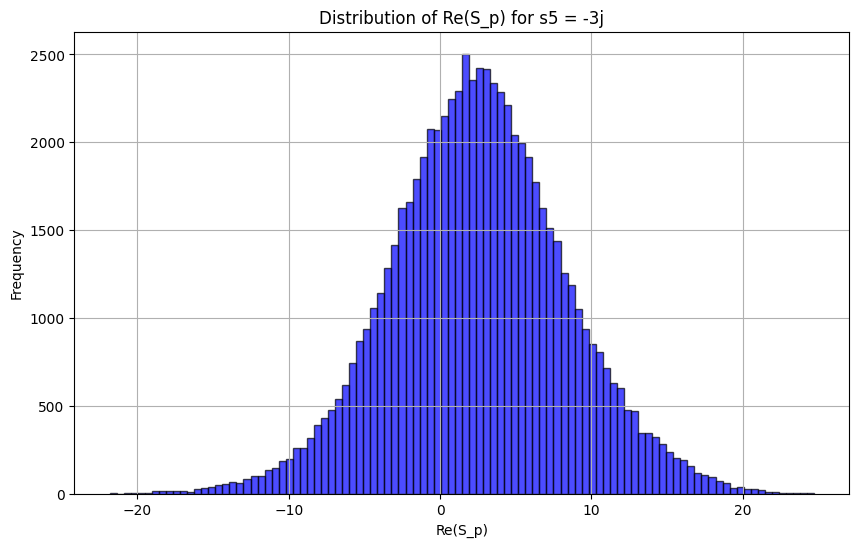

Mean of Re(S_p) for s5: 2.5238203730038435
Standard deviation of Re(S_p) for s5: 5.805944013028668


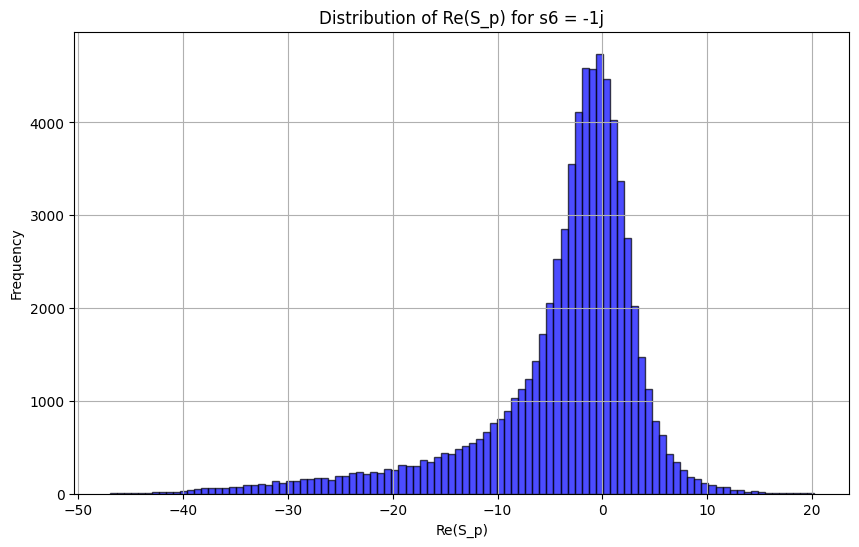

Mean of Re(S_p) for s6: -3.889587065645076
Standard deviation of Re(S_p) for s6: 8.006660152959851


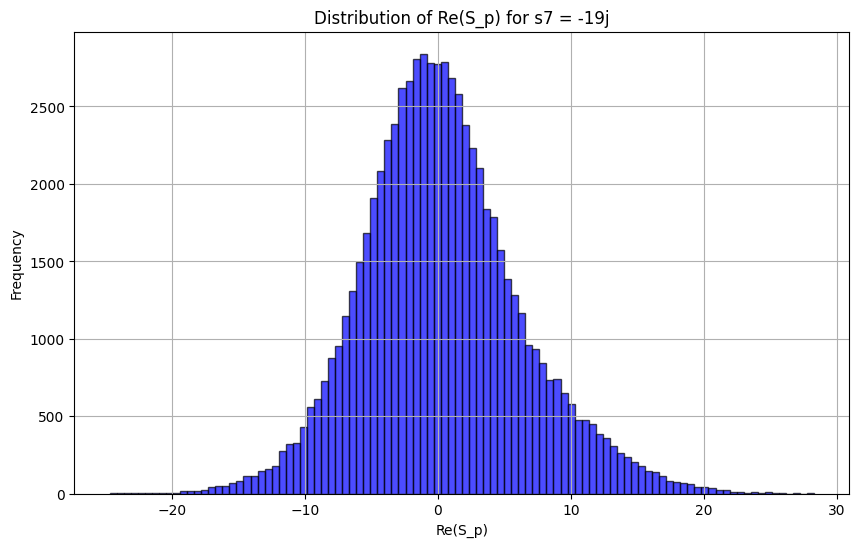

Mean of Re(S_p) for s7: 0.2866182663563819
Standard deviation of Re(S_p) for s7: 5.976275686387317


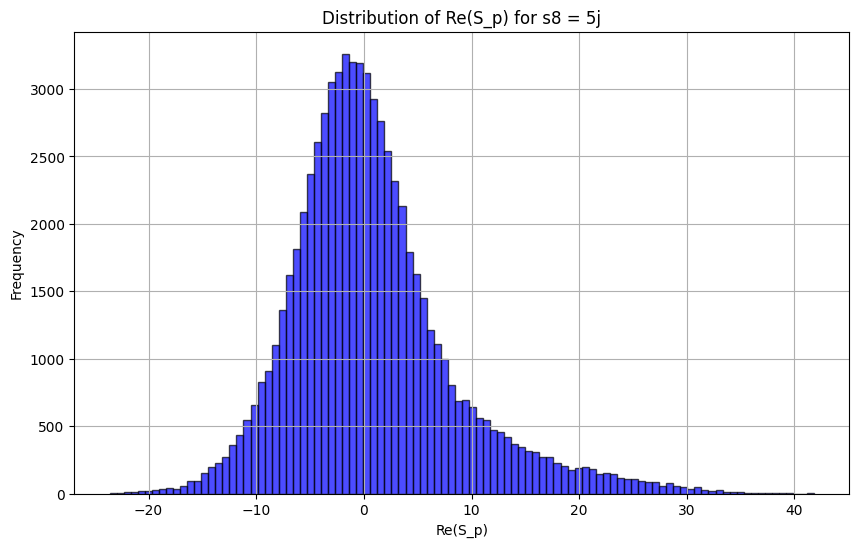

Mean of Re(S_p) for s8: 0.6969703646846763
Standard deviation of Re(S_p) for s8: 7.605812596691406


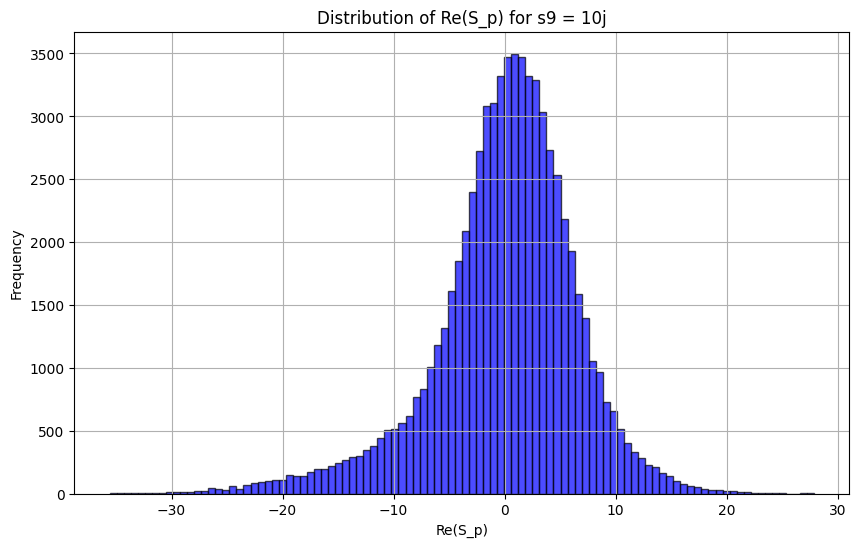

Mean of Re(S_p) for s9: -0.018793003285856792
Standard deviation of Re(S_p) for s9: 6.52334465327273


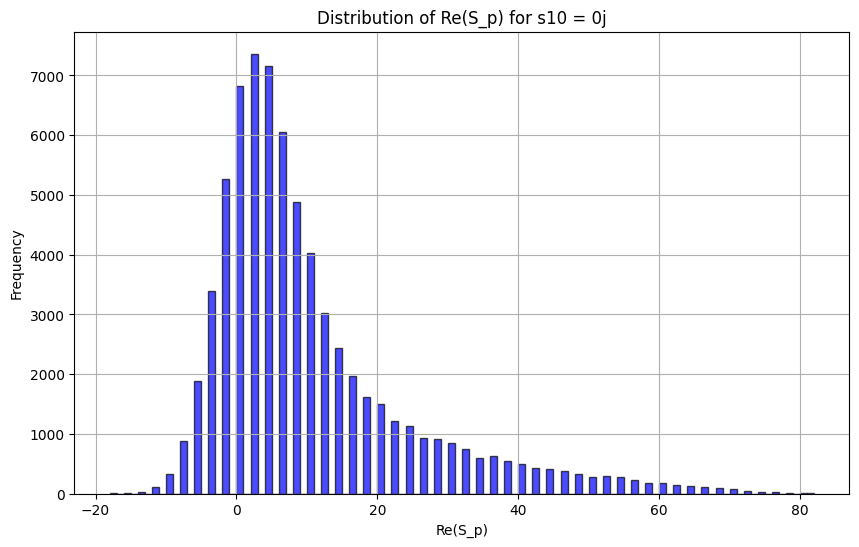

Mean of Re(S_p) for s10: 9.957237169021083
Standard deviation of Re(S_p) for s10: 14.361978229356533


In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol
import random

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
real_part = float(input("Enter the real part of s: "))  # User input for the real part of s
K = 100

# Generate 10 different s-values
s_values = []
imaginary_parts = random.sample(range(-20, 21), 9)  # Pick 9 unique random integers between -20 and 20
imaginary_parts.append(0)  # Ensure one value has imaginary part 0
random.shuffle(imaginary_parts)  # Shuffle the list to randomize positions

s_values = [complex(real_part, imag) for imag in imaginary_parts]

print("Generated s-values:")
for idx, s in enumerate(s_values, start=1):
    print(f"s{idx} = {s}")

# Generate all primes in the range [X, 2X]
all_primes = list(sympy.primerange(X, 2 * X))
num_primes = len(all_primes)

if num_primes == 0:
    print(f"No primes found in the range [{X}, {2 * X}].")
    exit()

print(f"Number of primes in the range [{X}, {2 * X}]: {num_primes}")

# Function to compute S_p for a given s
def compute_S_p(s):
    S_real = []  # Store the real part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        S_real.append(S_real_p)

    # Ensure all elements in S_real are floats
    S_real_float = []
    for val in S_real:
        try:
            S_real_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value: {val}")

    # Convert to NumPy array for further processing
    S_real_float = np.array(S_real_float)

    # Filter out invalid (non-finite) values
    finite_S_real = S_real_float[np.isfinite(S_real_float)]

    return finite_S_real

# Compute S_p and plot for each s value
for idx, s in enumerate(s_values, start=1):
    finite_S_real = compute_S_p(s)

    if len(finite_S_real) == 0:
        print(f"No valid data to plot for s{idx} = {s}.")
    else:
        # Plot histogram of the real part of S_p for the current s
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Re(S_p) for s{idx} = {s}")
        plt.xlabel("Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Re(S_p) for s{idx}: {mean_real}")
        print(f"Standard deviation of Re(S_p) for s{idx}: {std_real}")


Enter a large value for X: 1000000
Enter the real part of s: -1
Generated s-values:
s1 = (-1+13j)
s2 = (-1-13j)
s3 = (-1+0j)
s4 = (-1+9j)
s5 = (-1-9j)
s6 = (-1-20j)
s7 = (-1+1j)
s8 = (-1-5j)
s9 = (-1+18j)
s10 = (-1+10j)
Number of primes in the range [1000000, 2000000]: 70435


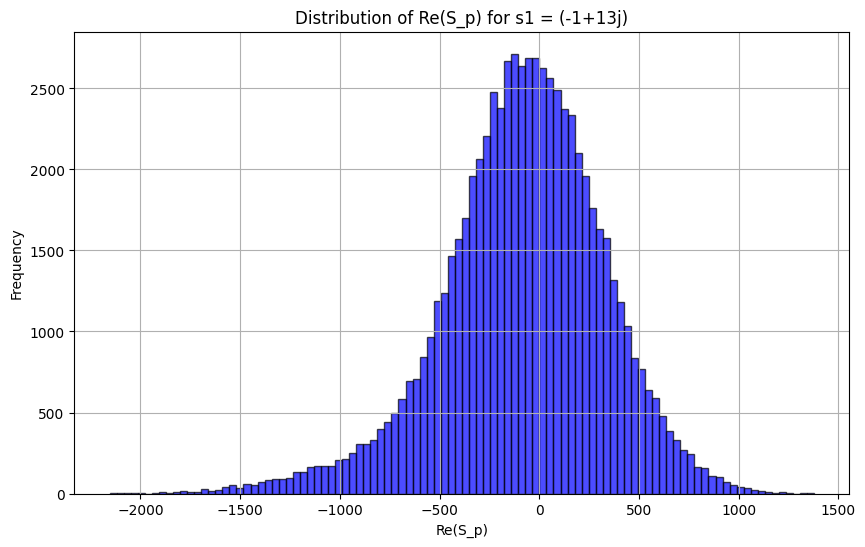

Mean of Re(S_p) for s1: -84.75956104626945
Standard deviation of Re(S_p) for s1: 409.17732760238334


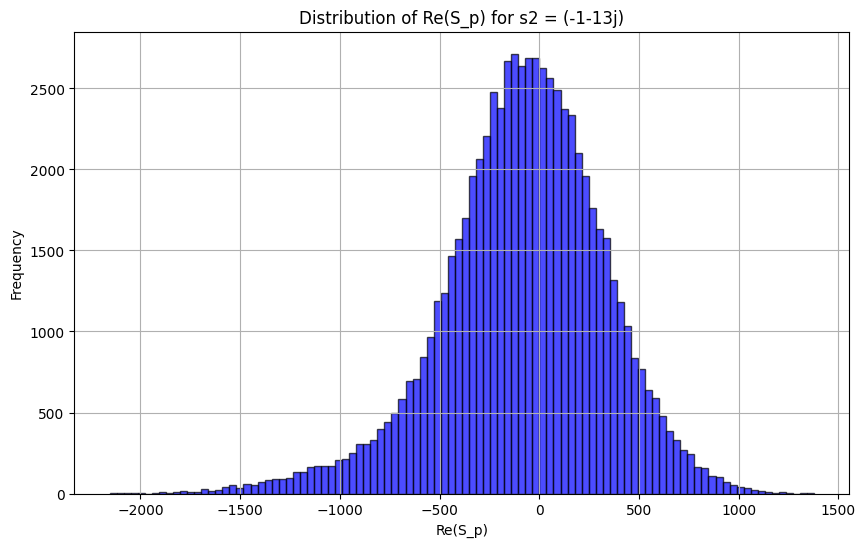

Mean of Re(S_p) for s2: -84.75956104626945
Standard deviation of Re(S_p) for s2: 409.17732760238334


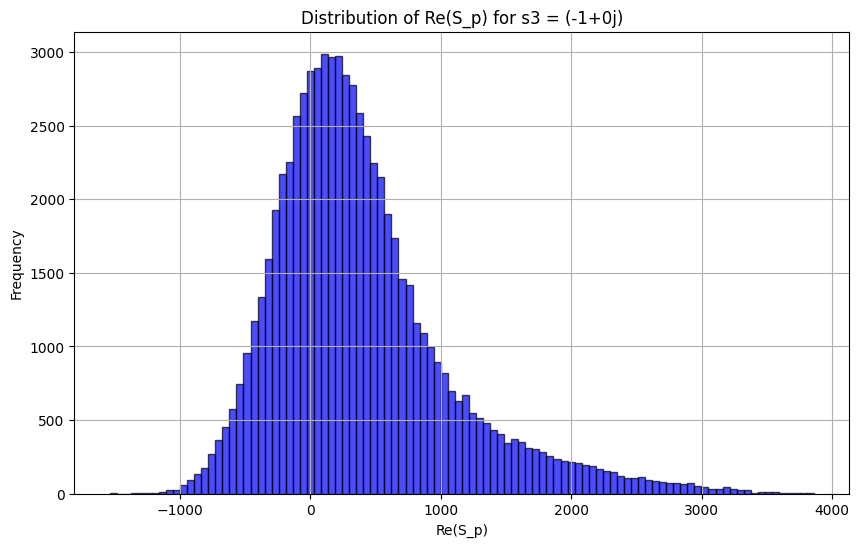

Mean of Re(S_p) for s3: 382.9960105061404
Standard deviation of Re(S_p) for s3: 679.557794176077


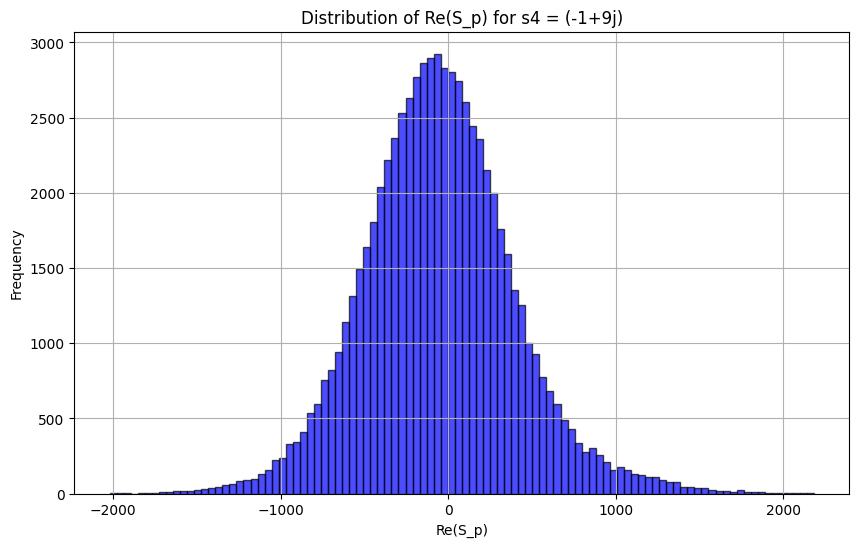

Mean of Re(S_p) for s4: -54.12371509993532
Standard deviation of Re(S_p) for s4: 450.74846389357896


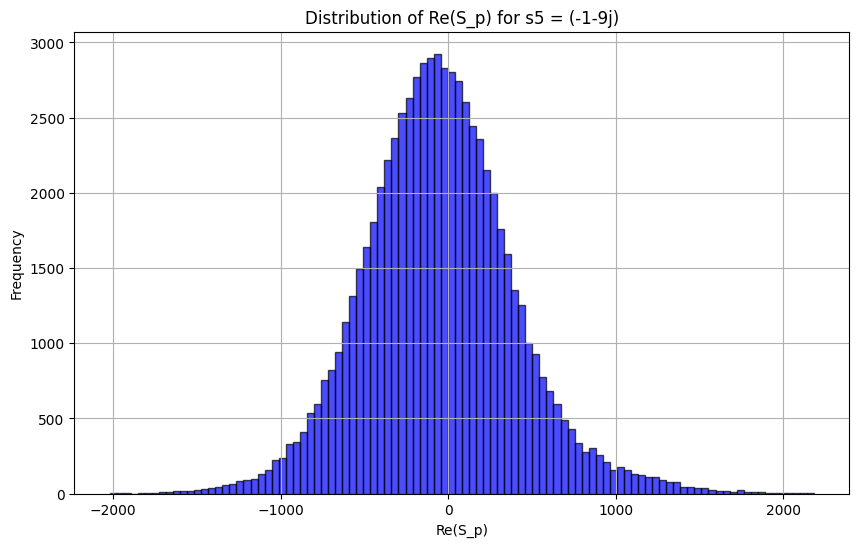

Mean of Re(S_p) for s5: -54.12371509993532
Standard deviation of Re(S_p) for s5: 450.74846389357896


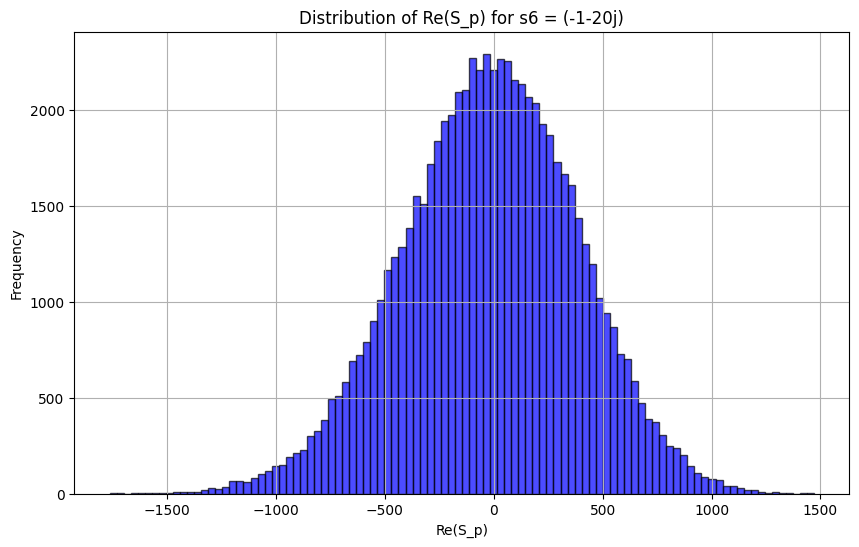

Mean of Re(S_p) for s6: -20.084541552538436
Standard deviation of Re(S_p) for s6: 403.7860169097626


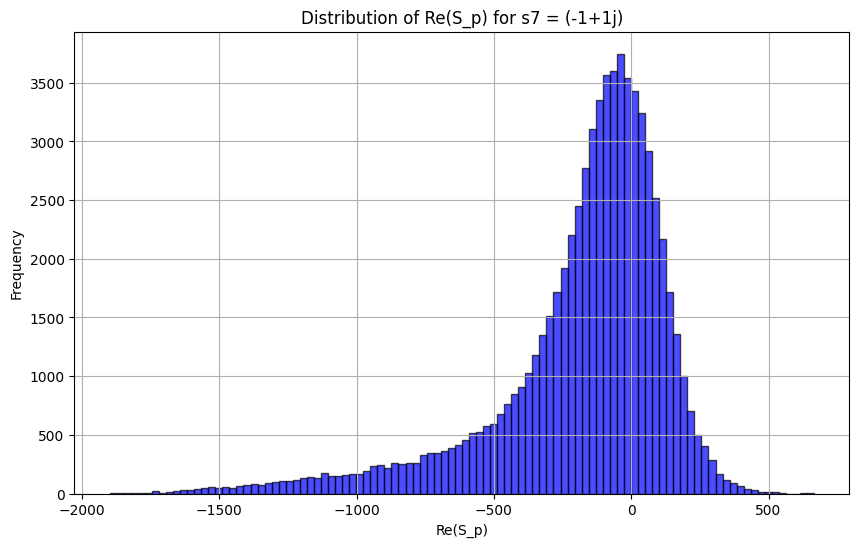

Mean of Re(S_p) for s7: -180.6631957278088
Standard deviation of Re(S_p) for s7: 322.37873066728326


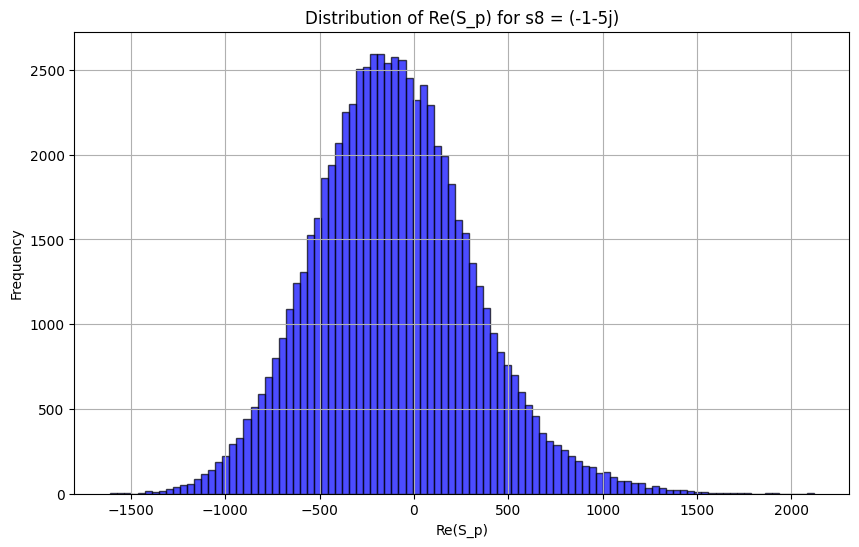

Mean of Re(S_p) for s8: -107.32337698514819
Standard deviation of Re(S_p) for s8: 419.9595583365261


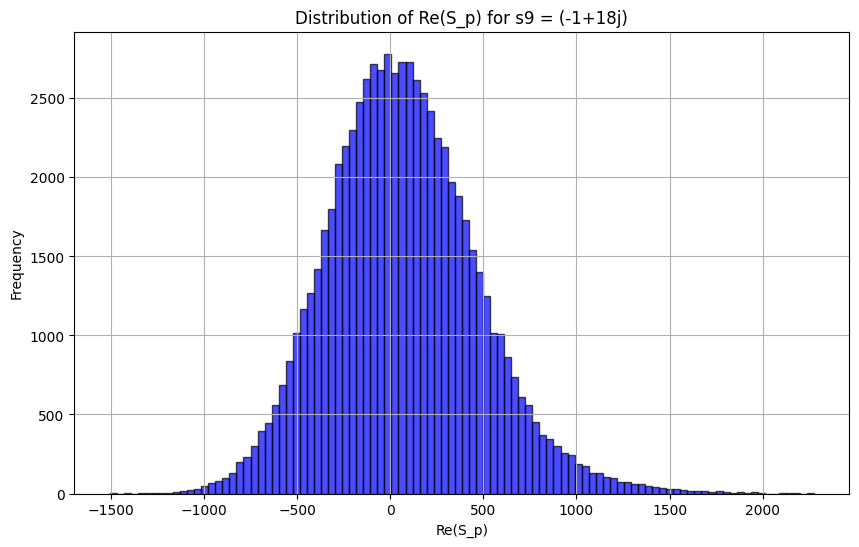

Mean of Re(S_p) for s9: 67.40651614692524
Standard deviation of Re(S_p) for s9: 404.19887605891114


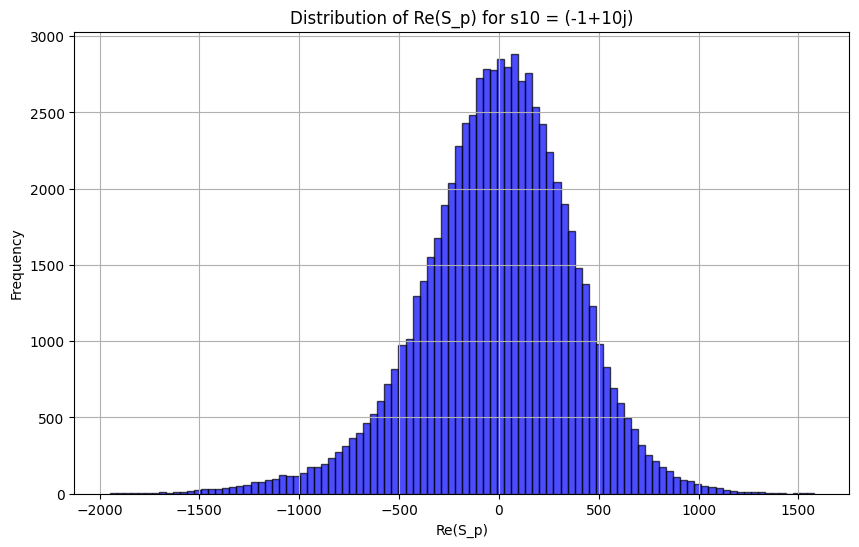

Mean of Re(S_p) for s10: -9.788790213969971
Standard deviation of Re(S_p) for s10: 382.3038775316564


In [2]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol
import random

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
real_part = float(input("Enter the real part of s: "))  # User input for the real part of s
K = 100

# Generate 10 different s-values
s_values = []
imaginary_parts = random.sample(range(-20, 21), 9)  # Pick 9 unique random integers between -20 and 20
imaginary_parts.append(0)  # Ensure one value has imaginary part 0
random.shuffle(imaginary_parts)  # Shuffle the list to randomize positions

s_values = [complex(real_part, imag) for imag in imaginary_parts]

print("Generated s-values:")
for idx, s in enumerate(s_values, start=1):
    print(f"s{idx} = {s}")

# Generate all primes in the range [X, 2X]
all_primes = list(sympy.primerange(X, 2 * X))
num_primes = len(all_primes)

if num_primes == 0:
    print(f"No primes found in the range [{X}, {2 * X}].")
    exit()

print(f"Number of primes in the range [{X}, {2 * X}]: {num_primes}")

# Function to compute S_p for a given s
def compute_S_p(s):
    S_real = []  # Store the real part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        S_real.append(S_real_p)

    # Ensure all elements in S_real are floats
    S_real_float = []
    for val in S_real:
        try:
            S_real_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value: {val}")

    # Convert to NumPy array for further processing
    S_real_float = np.array(S_real_float)

    # Filter out invalid (non-finite) values
    finite_S_real = S_real_float[np.isfinite(S_real_float)]

    return finite_S_real

# Compute S_p and plot for each s value
for idx, s in enumerate(s_values, start=1):
    finite_S_real = compute_S_p(s)

    if len(finite_S_real) == 0:
        print(f"No valid data to plot for s{idx} = {s}.")
    else:
        # Plot histogram of the real part of S_p for the current s
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Re(S_p) for s{idx} = {s}")
        plt.xlabel("Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Re(S_p) for s{idx}: {mean_real}")
        print(f"Standard deviation of Re(S_p) for s{idx}: {std_real}")


Generated s-values:
s1 = (-2+0j)
s2 = (-2-6j)
s3 = (-2+7j)
s4 = (-2+1j)
s5 = (-2-11j)
s6 = (-2+3j)
s7 = (-2+17j)
s8 = (-2+0j)
s9 = (-2-14j)
s10 = (-2+18j)
Number of primes in the range [1000000, 2000000]: 70435


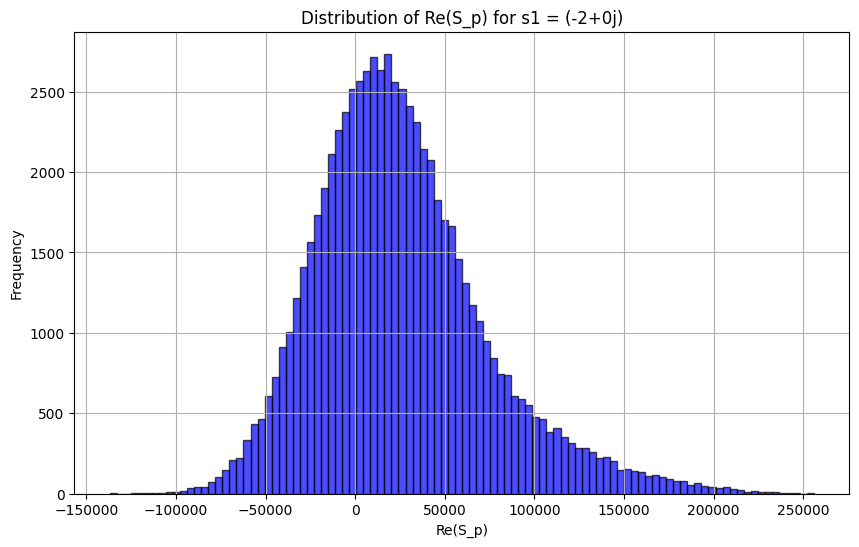

Mean of Re(S_p) for s1: 25184.742017462908
Standard deviation of Re(S_p) for s1: 48020.541603817284


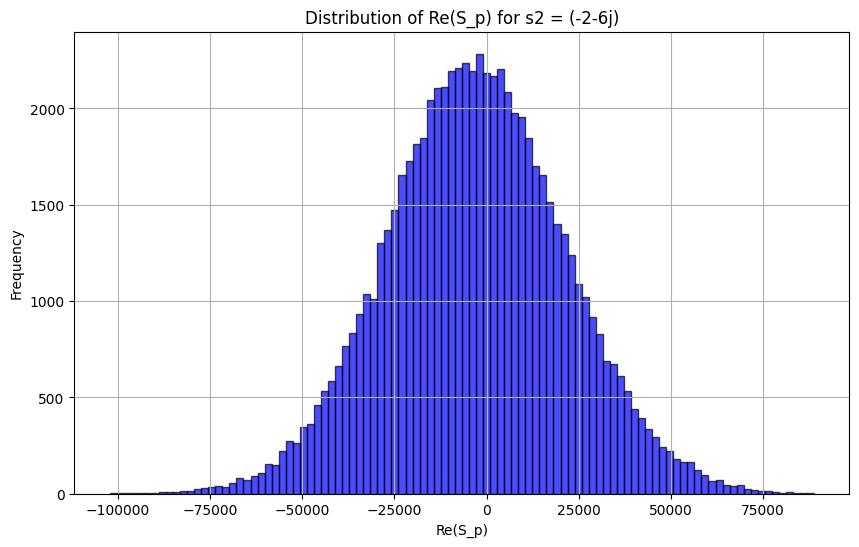

Mean of Re(S_p) for s2: -2918.6185964563624
Standard deviation of Re(S_p) for s2: 24204.357903926986


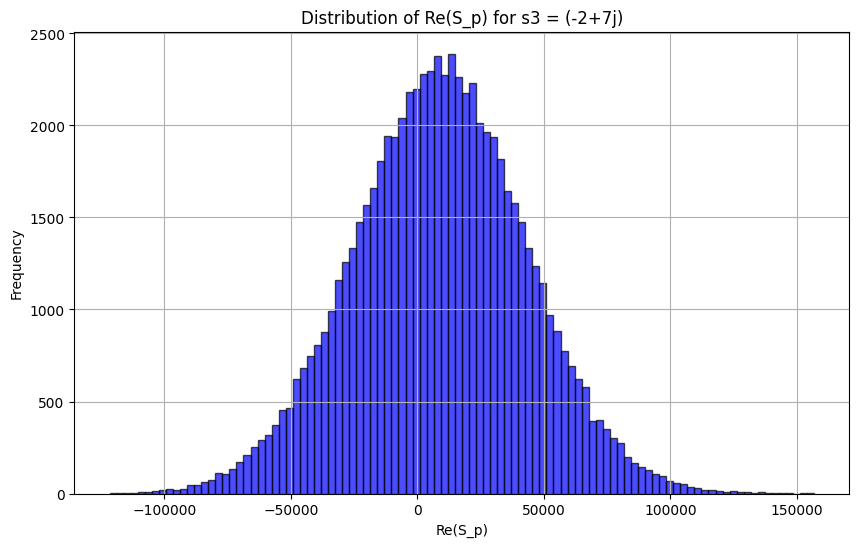

Mean of Re(S_p) for s3: 8832.064595010324
Standard deviation of Re(S_p) for s3: 34333.80257724731


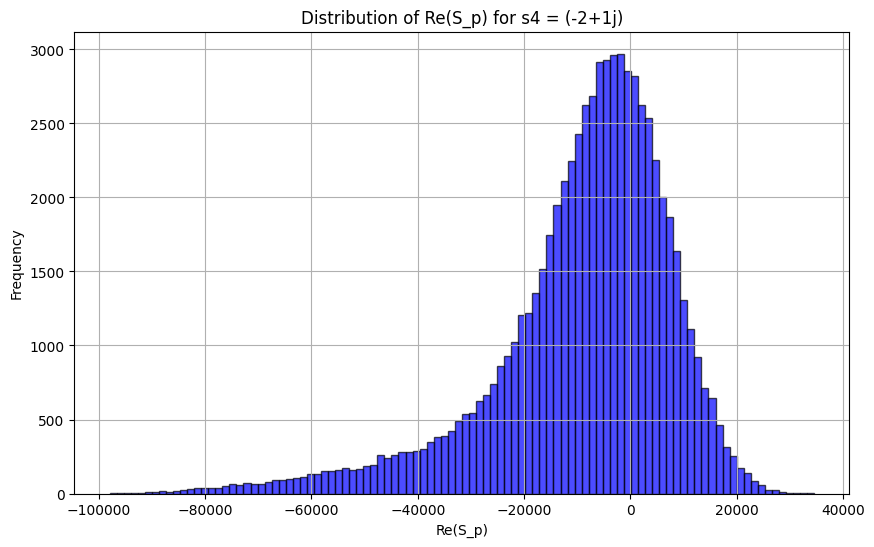

Mean of Re(S_p) for s4: -9070.556104231731
Standard deviation of Re(S_p) for s4: 17219.063232028904


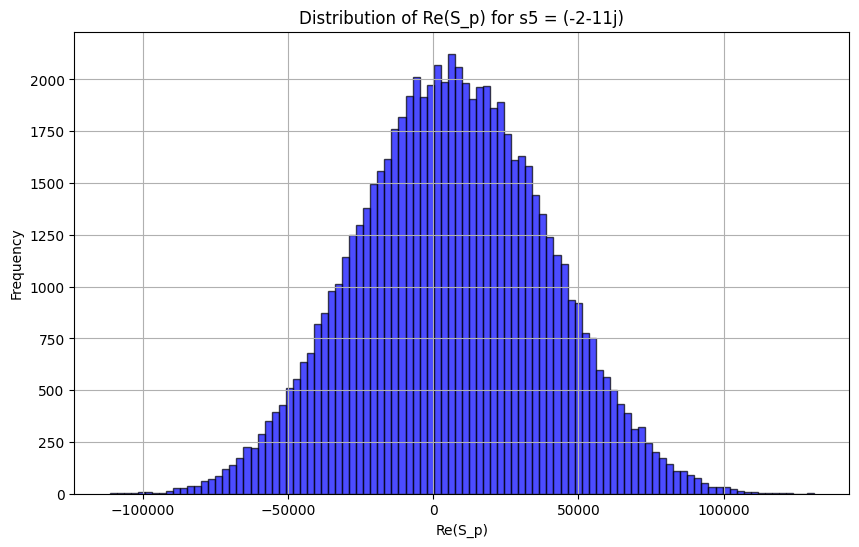

Mean of Re(S_p) for s5: 6531.238282212601
Standard deviation of Re(S_p) for s5: 32365.013070502962


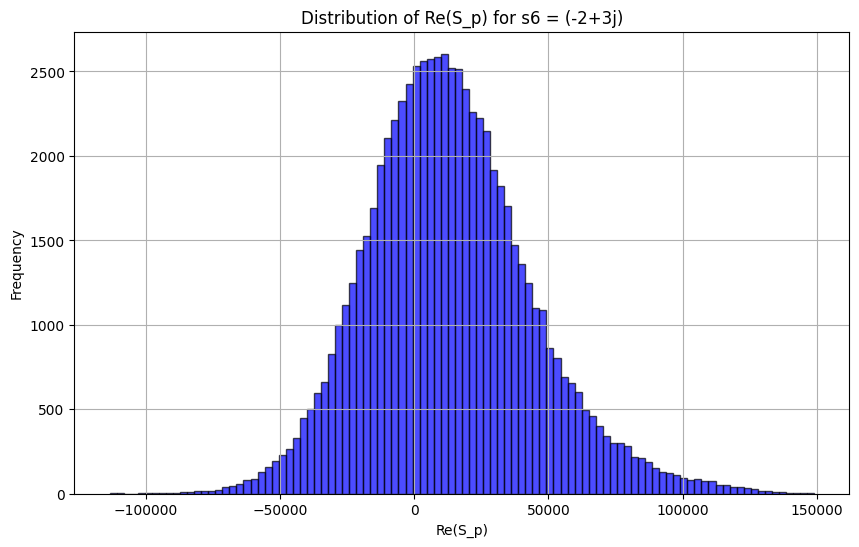

Mean of Re(S_p) for s6: 13078.18324280706
Standard deviation of Re(S_p) for s6: 30777.614249685583


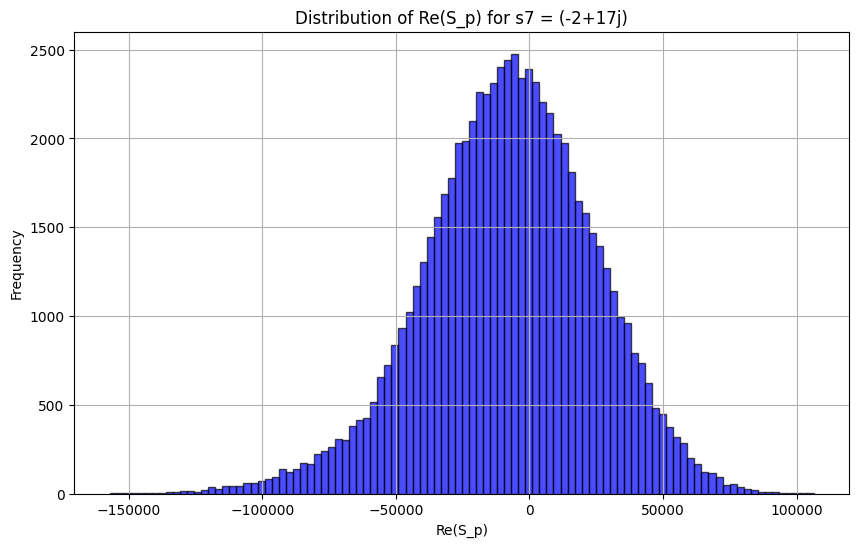

Mean of Re(S_p) for s7: -7761.566431061682
Standard deviation of Re(S_p) for s7: 32039.043475510563


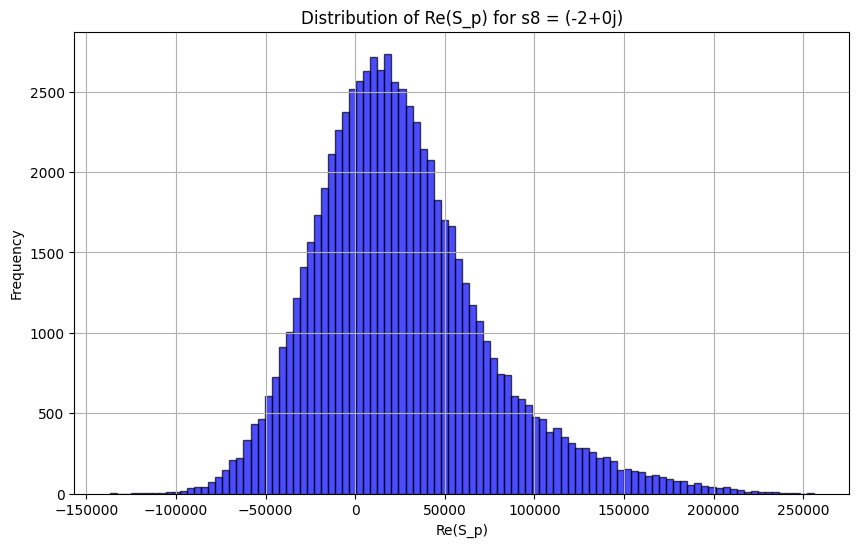

Mean of Re(S_p) for s8: 25184.742017462908
Standard deviation of Re(S_p) for s8: 48020.541603817284


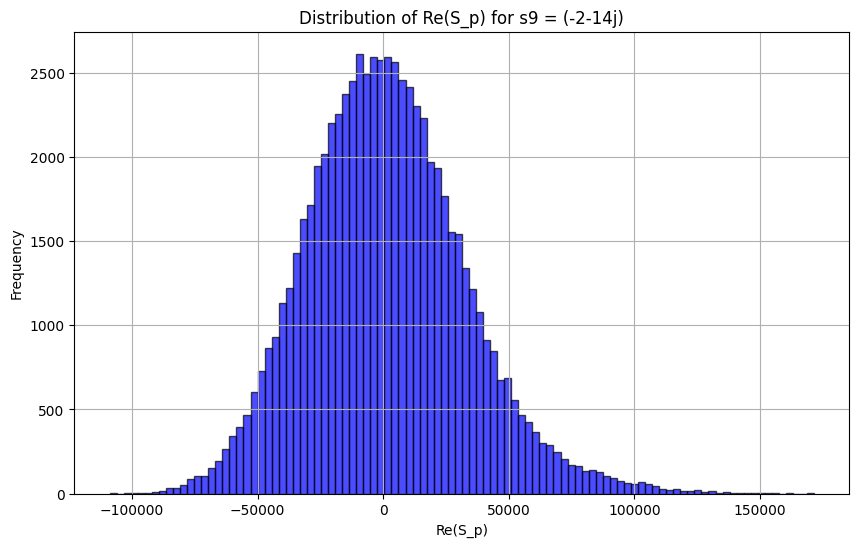

Mean of Re(S_p) for s9: 1120.1876089703405
Standard deviation of Re(S_p) for s9: 31576.507888006465


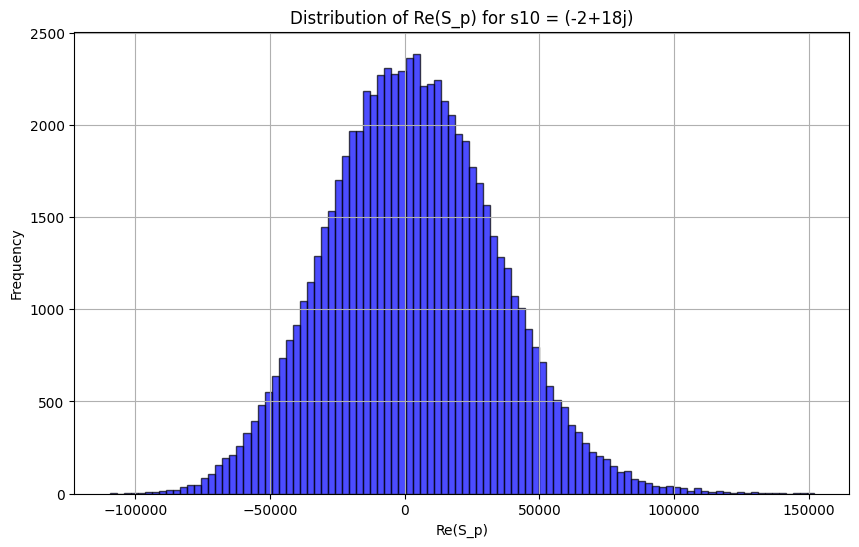

Mean of Re(S_p) for s10: 2997.9184070142155
Standard deviation of Re(S_p) for s10: 31238.71111686259


In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol
import random

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
real_part = float(input("Enter the real part of s: "))  # User input for the real part of s
K = 100

# Generate 10 different s-values
s_values = []
imaginary_parts = random.sample(range(-20, 21), 9)  # Pick 9 unique random integers between -20 and 20
imaginary_parts.append(0)  # Ensure one value has imaginary part 0
random.shuffle(imaginary_parts)  # Shuffle the list to randomize positions

s_values = [complex(real_part, imag) for imag in imaginary_parts]

print("Generated s-values:")
for idx, s in enumerate(s_values, start=1):
    print(f"s{idx} = {s}")

# Generate all primes in the range [X, 2X]
all_primes = list(sympy.primerange(X, 2 * X))
num_primes = len(all_primes)

if num_primes == 0:
    print(f"No primes found in the range [{X}, {2 * X}].")
    exit()

print(f"Number of primes in the range [{X}, {2 * X}]: {num_primes}")

# Function to compute S_p for a given s
def compute_S_p(s):
    S_real = []  # Store the real part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        S_real.append(S_real_p)

    # Ensure all elements in S_real are floats
    S_real_float = []
    for val in S_real:
        try:
            S_real_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value: {val}")

    # Convert to NumPy array for further processing
    S_real_float = np.array(S_real_float)

    # Filter out invalid (non-finite) values
    finite_S_real = S_real_float[np.isfinite(S_real_float)]

    return finite_S_real

# Compute S_p and plot for each s value
for idx, s in enumerate(s_values, start=1):
    finite_S_real = compute_S_p(s)

    if len(finite_S_real) == 0:
        print(f"No valid data to plot for s{idx} = {s}.")
    else:
        # Plot histogram of the real part of S_p for the current s
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Re(S_p) for s{idx} = {s}")
        plt.xlabel("Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Re(S_p) for s{idx}: {mean_real}")
        print(f"Standard deviation of Re(S_p) for s{idx}: {std_real}")


Enter a large value for X: 1000000
Enter the real part of s: -1
Generated s-values (sorted by increasing imaginary part):
s1 = (-1+0j)
s2 = (-1+3j)
s3 = (-1+8j)
s4 = (-1+11j)
s5 = (-1+18j)
s6 = (-1+19j)
s7 = (-1+24j)
s8 = (-1+40j)
s9 = (-1+47j)
s10 = (-1+48j)
Number of primes in the range [1000000, 2000000]: 70435


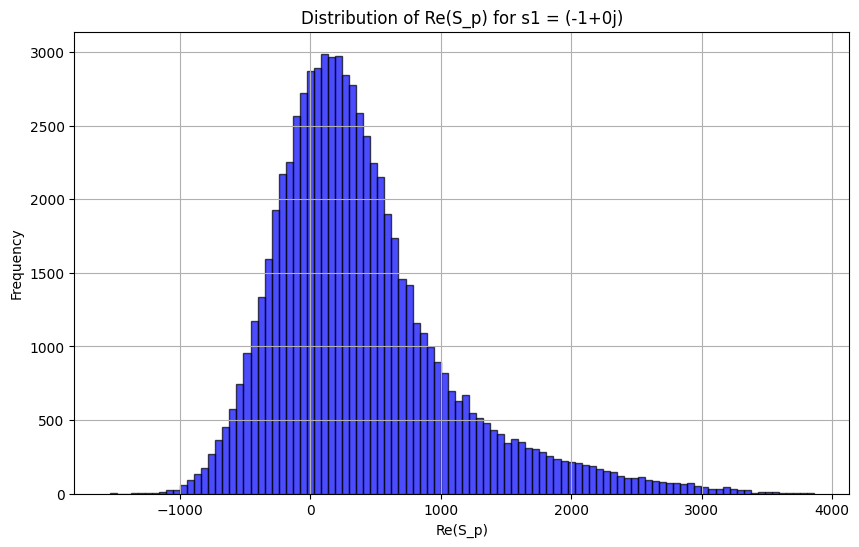

Mean of Re(S_p) for s1: 382.9960105061404
Standard deviation of Re(S_p) for s1: 679.557794176077


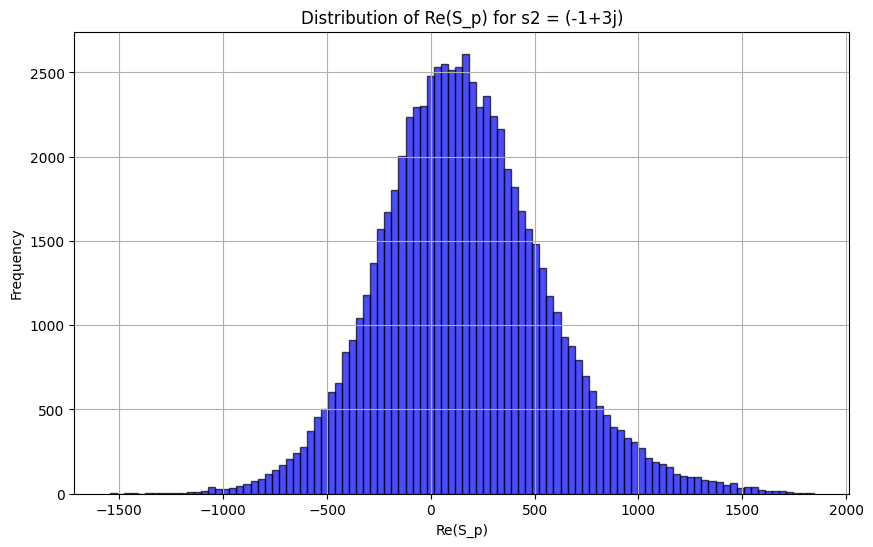

Mean of Re(S_p) for s2: 159.0959798224955
Standard deviation of Re(S_p) for s2: 399.3185326076403


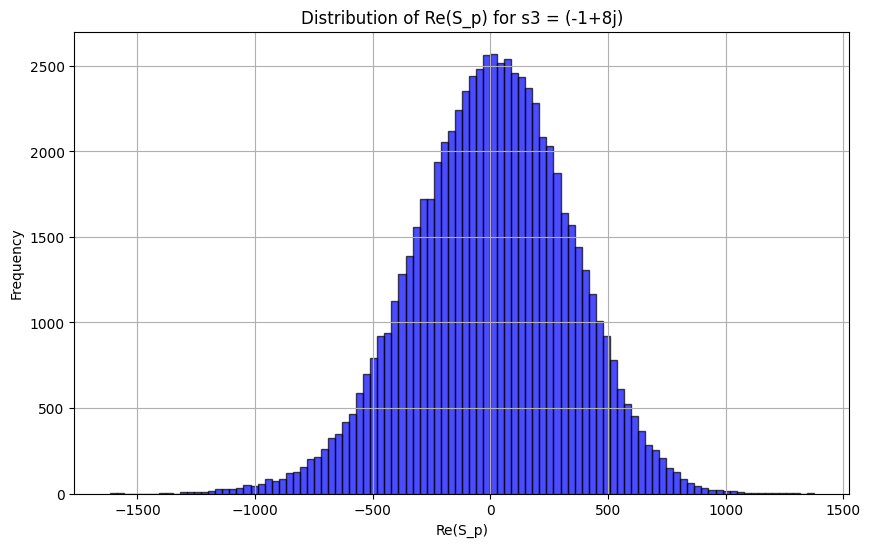

Mean of Re(S_p) for s3: 2.416325348961411
Standard deviation of Re(S_p) for s3: 332.5567585795037


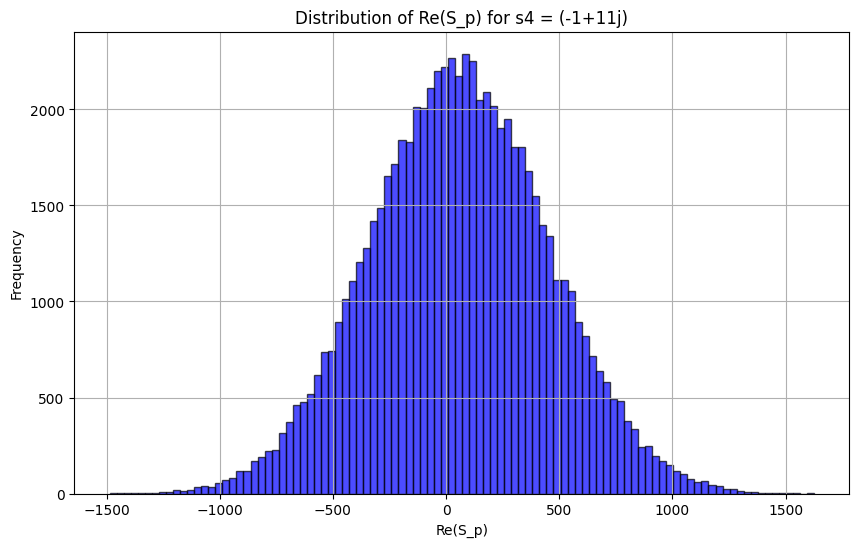

Mean of Re(S_p) for s4: 59.38423800503111
Standard deviation of Re(S_p) for s4: 393.22732695313


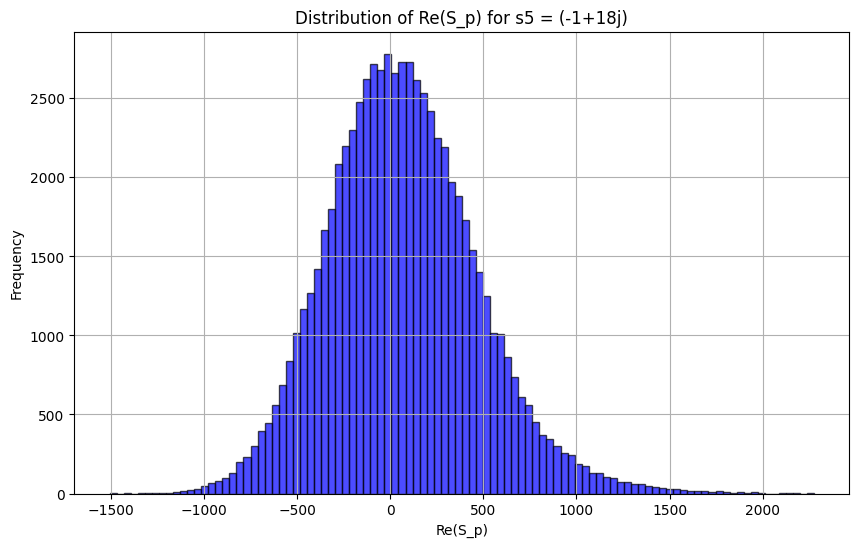

Mean of Re(S_p) for s5: 67.40651614692524
Standard deviation of Re(S_p) for s5: 404.19887605891114


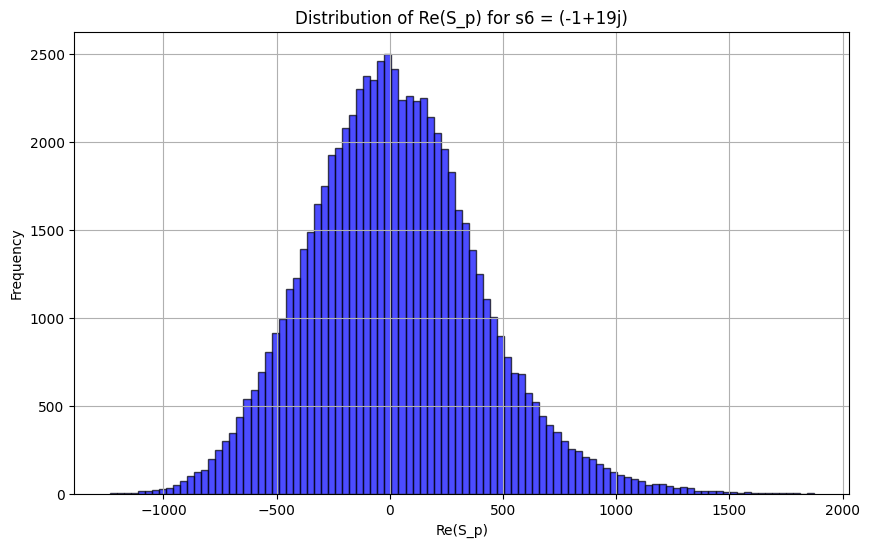

Mean of Re(S_p) for s6: 19.535202453530268
Standard deviation of Re(S_p) for s6: 376.3788394839722


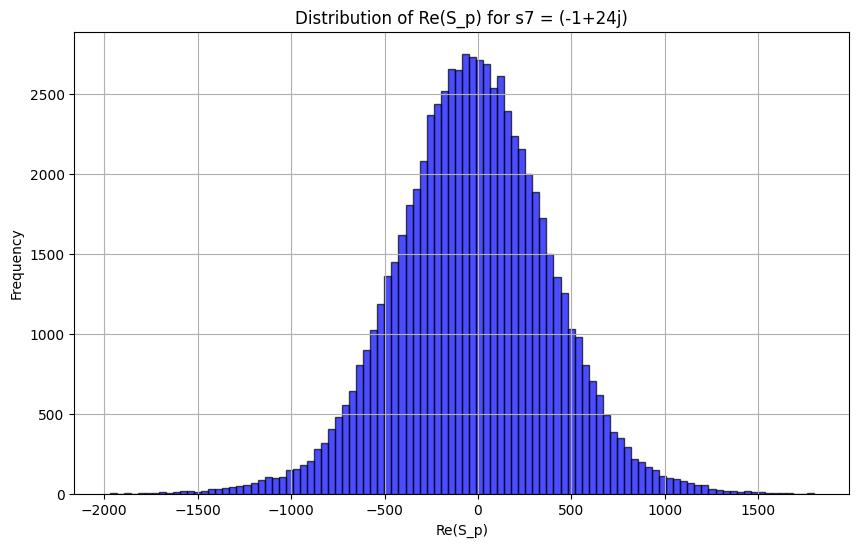

Mean of Re(S_p) for s7: -26.440916847914064
Standard deviation of Re(S_p) for s7: 408.33057383056274


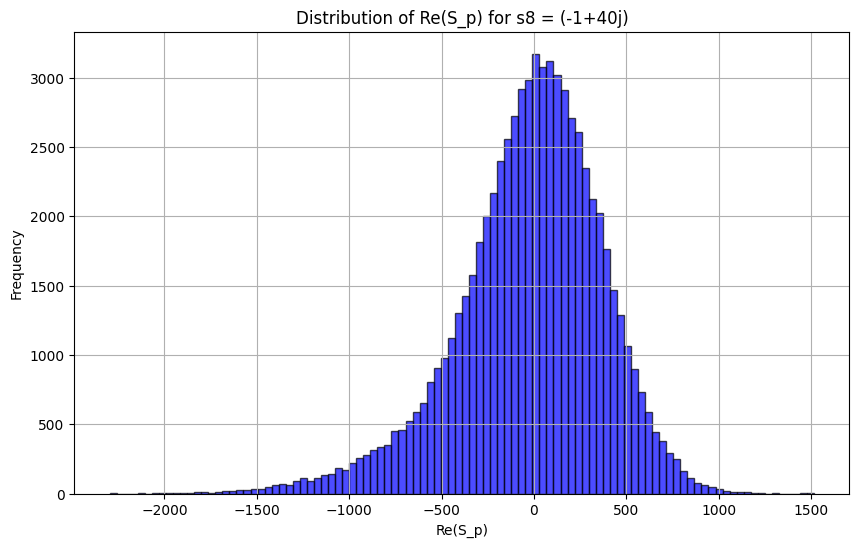

Mean of Re(S_p) for s8: -25.414507411587824
Standard deviation of Re(S_p) for s8: 395.6792413143416


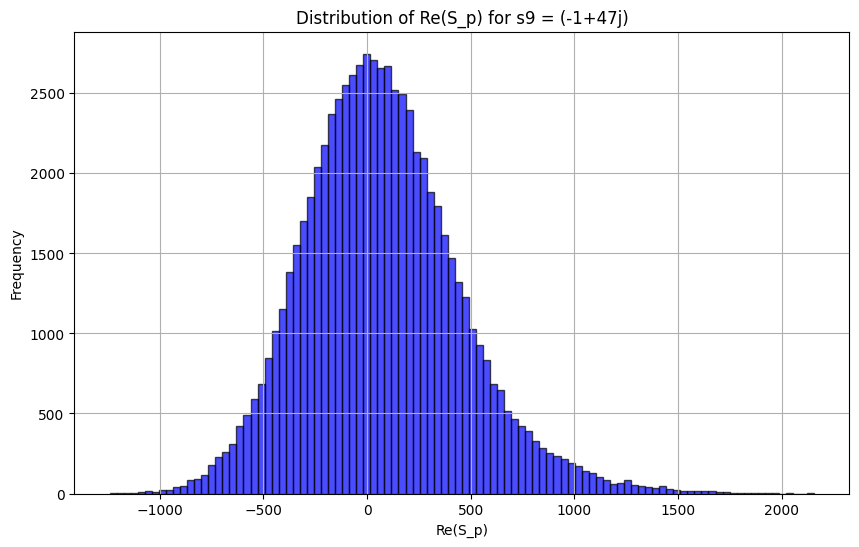

Mean of Re(S_p) for s9: 70.98876580233403
Standard deviation of Re(S_p) for s9: 378.48022302210535


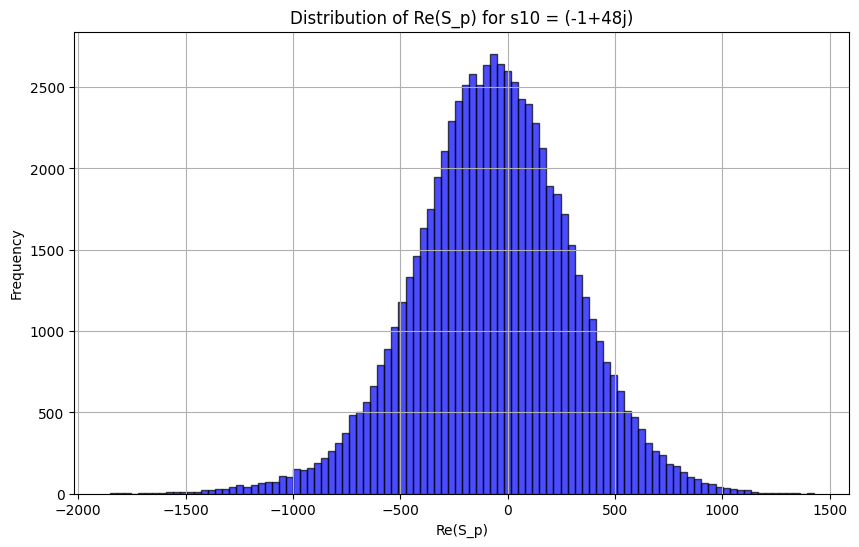

Mean of Re(S_p) for s10: -69.08936438472992
Standard deviation of Re(S_p) for s10: 367.0448759972173


In [2]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol
import random

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
real_part = float(input("Enter the real part of s: "))  # User input for the real part of s
K = 100

# Generate 10 different s-values with imaginary parts between 0 and 50
imaginary_parts = random.sample(range(1, 51), 9)  # Pick 9 unique random integers between 1 and 50
imaginary_parts.append(0)  # Ensure one value is 0
imaginary_parts.sort()  # Sort in increasing order

s_values = [complex(real_part, imag) for imag in imaginary_parts]

print("Generated s-values (sorted by increasing imaginary part):")
for idx, s in enumerate(s_values, start=1):
    print(f"s{idx} = {s}")

# Generate all primes in the range [X, 2X]
all_primes = list(sympy.primerange(X, 2 * X))
num_primes = len(all_primes)

if num_primes == 0:
    print(f"No primes found in the range [{X}, {2 * X}].")
    exit()

print(f"Number of primes in the range [{X}, {2 * X}]: {num_primes}")

# Function to compute S_p for a given s
def compute_S_p(s):
    S_real = []  # Store the real part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        S_real.append(S_real_p)

    # Ensure all elements in S_real are floats
    S_real_float = []
    for val in S_real:
        try:
            S_real_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value: {val}")

    # Convert to NumPy array for further processing
    S_real_float = np.array(S_real_float)

    # Filter out invalid (non-finite) values
    finite_S_real = S_real_float[np.isfinite(S_real_float)]

    return finite_S_real

# Compute S_p and plot for each s value
for idx, s in enumerate(s_values, start=1):
    finite_S_real = compute_S_p(s)

    if len(finite_S_real) == 0:
        print(f"No valid data to plot for s{idx} = {s}.")
    else:
        # Plot histogram of the real part of S_p for the current s
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Re(S_p) for s{idx} = {s}")
        plt.xlabel("Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Re(S_p) for s{idx}: {mean_real}")
        print(f"Standard deviation of Re(S_p) for s{idx}: {std_real}")


Enter a large value for X: 1000000
Enter the real part of s: -1
Generated s-values (sorted by increasing imaginary part):
s1 = (-1+0j)
s2 = (-1+6j)
s3 = (-1+12j)
s4 = (-1+18j)
s5 = (-1+29j)
s6 = (-1+30j)
s7 = (-1+33j)
s8 = (-1+37j)
s9 = (-1+38j)
s10 = (-1+47j)
Number of primes in the range [1000000, 2000000]: 70435


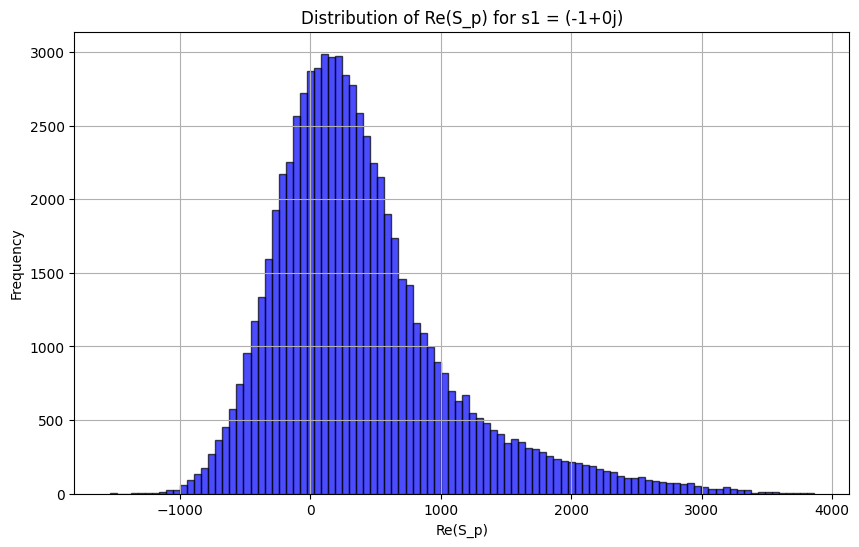

Mean of Re(S_p) for s1: 382.9960105061404
Standard deviation of Re(S_p) for s1: 679.557794176077


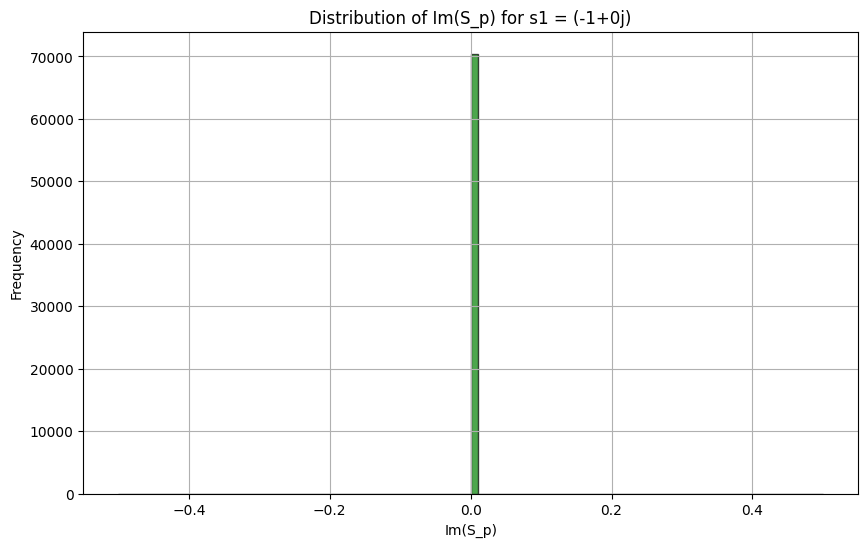

Mean of Im(S_p) for s1: 0.0
Standard deviation of Im(S_p) for s1: 0.0


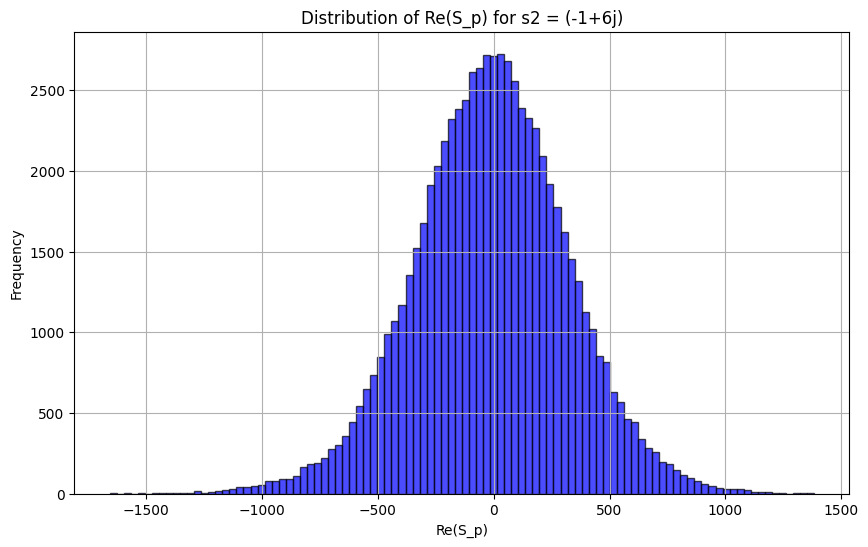

Mean of Re(S_p) for s2: -12.473844874299319
Standard deviation of Re(S_p) for s2: 333.26896457801854


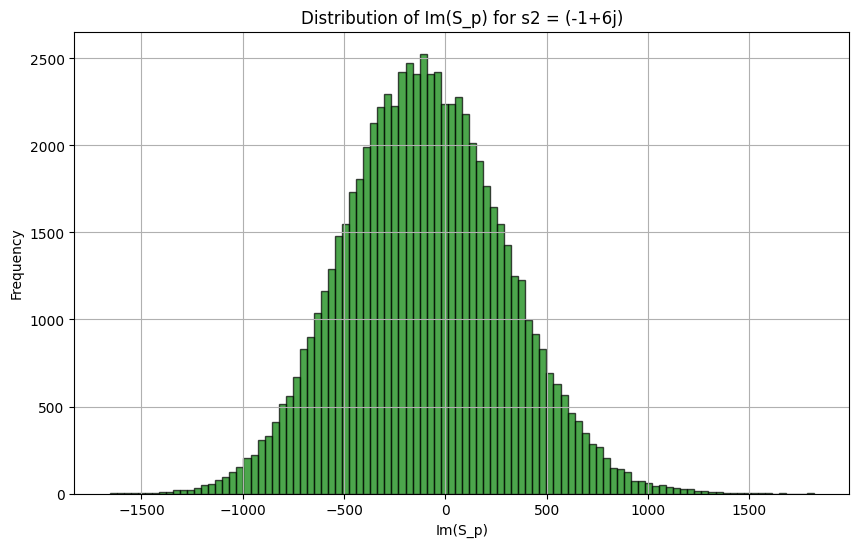

Mean of Im(S_p) for s2: -100.05084092489423
Standard deviation of Im(S_p) for s2: 397.0421663175032


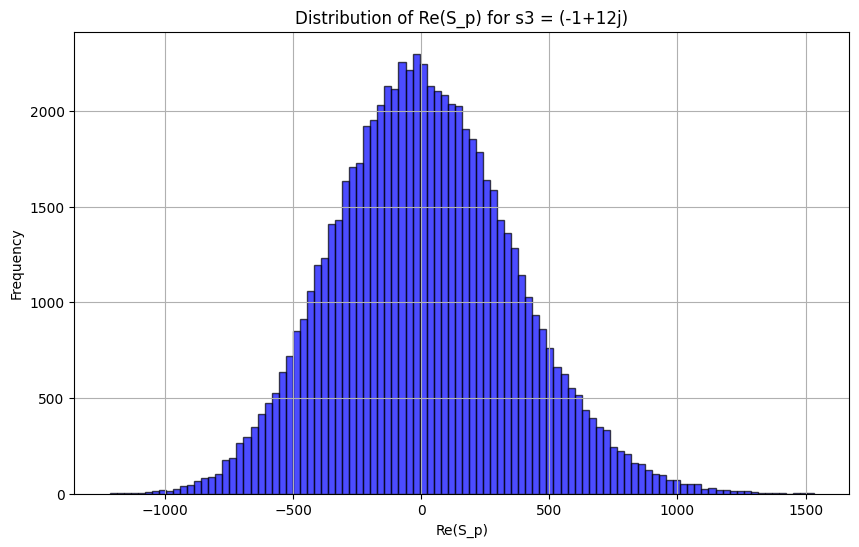

Mean of Re(S_p) for s3: 13.323016023986893
Standard deviation of Re(S_p) for s3: 350.4955048354634


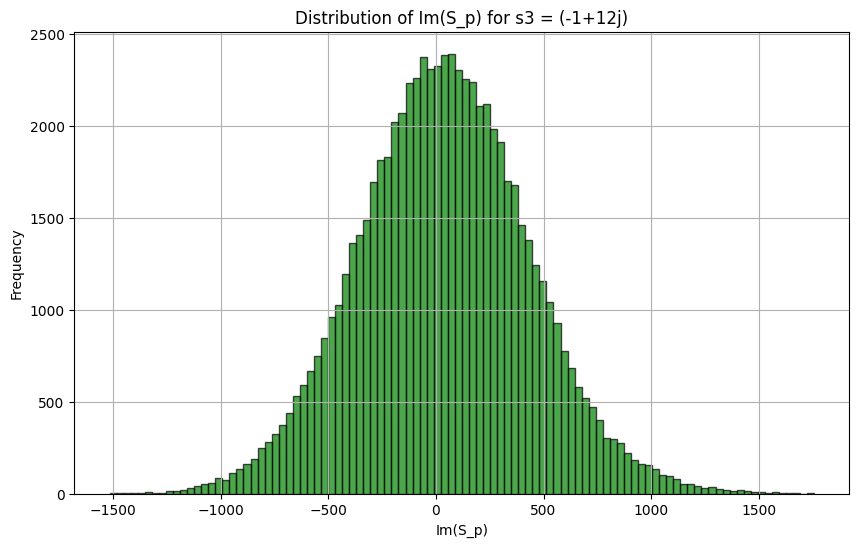

Mean of Im(S_p) for s3: 35.610496055142306
Standard deviation of Im(S_p) for s3: 396.6523725102492


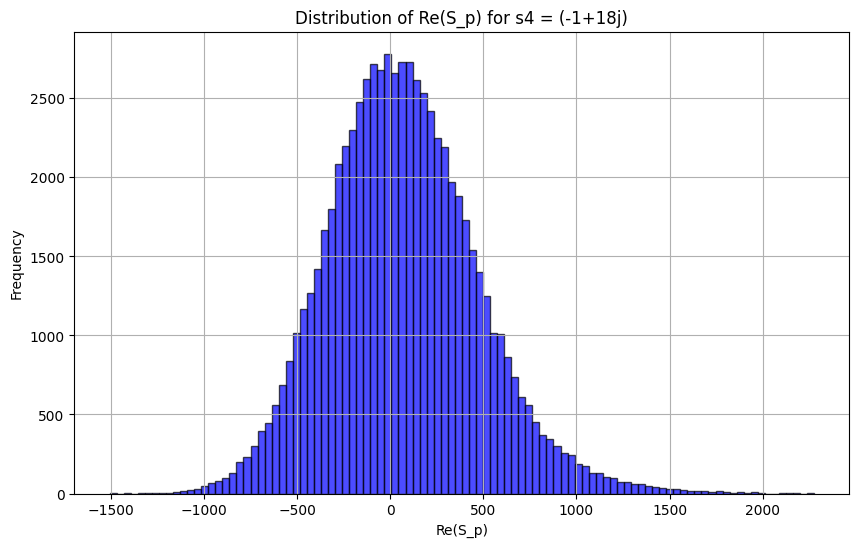

Mean of Re(S_p) for s4: 67.40651614692524
Standard deviation of Re(S_p) for s4: 404.19887605891114


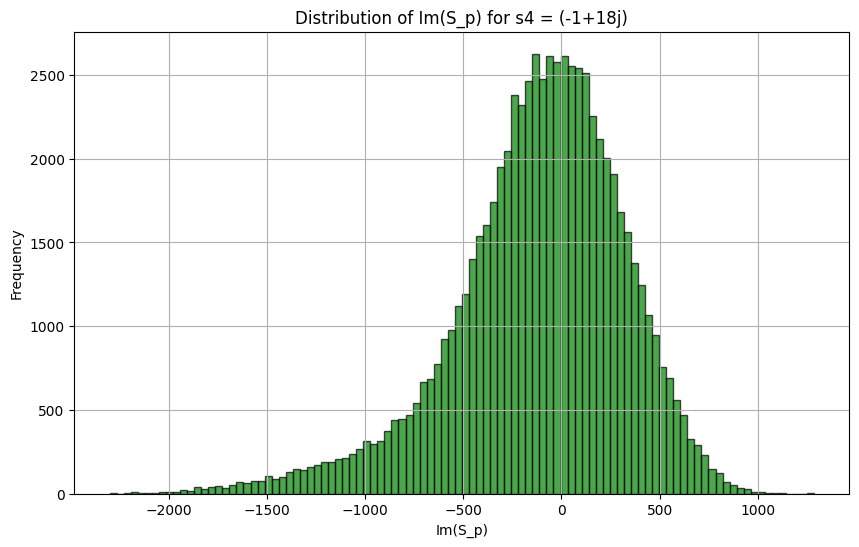

Mean of Im(S_p) for s4: -119.20995858295969
Standard deviation of Im(S_p) for s4: 439.99794940872215


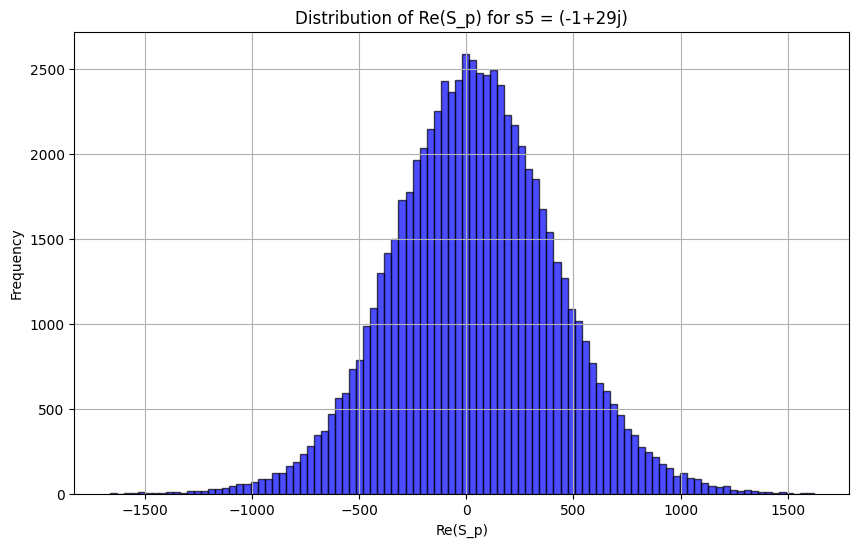

Mean of Re(S_p) for s5: 38.06671454071234
Standard deviation of Re(S_p) for s5: 379.16648438238883


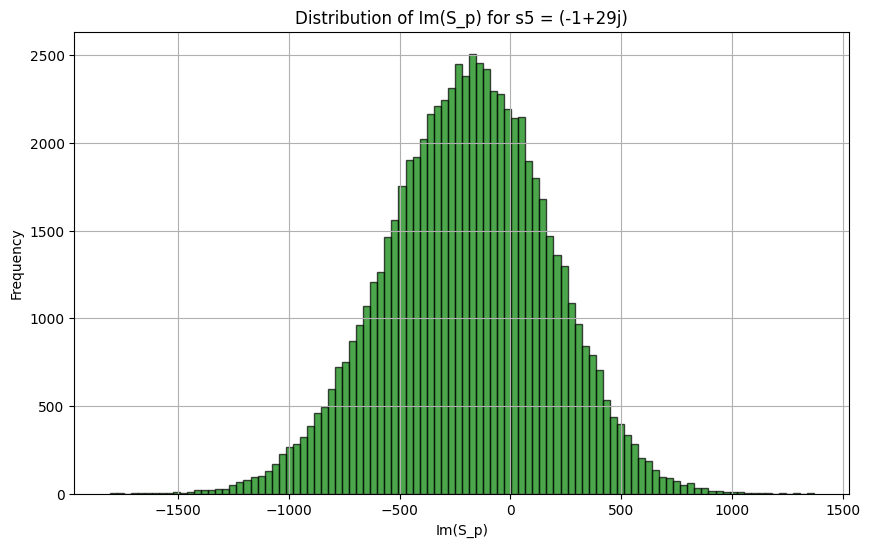

Mean of Im(S_p) for s5: -193.66856867580466
Standard deviation of Im(S_p) for s5: 365.95157146043823


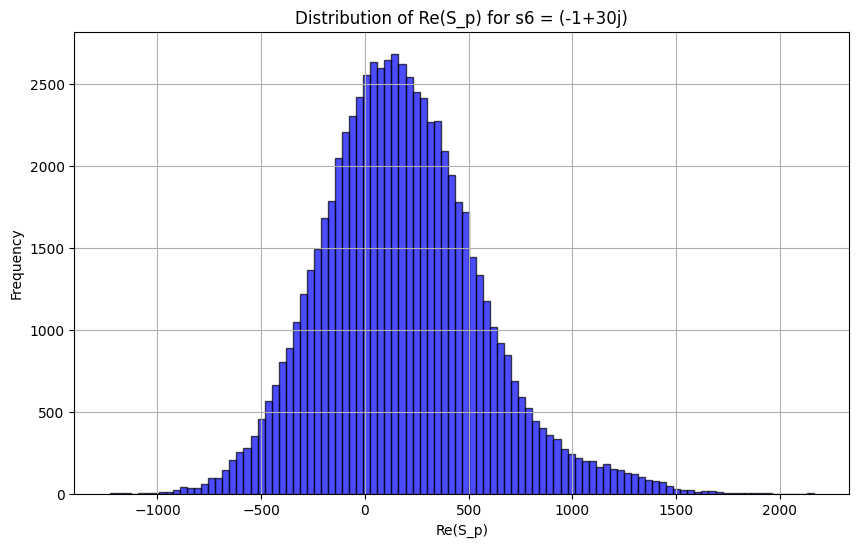

Mean of Re(S_p) for s6: 178.29510789734653
Standard deviation of Re(S_p) for s6: 383.0268307783149


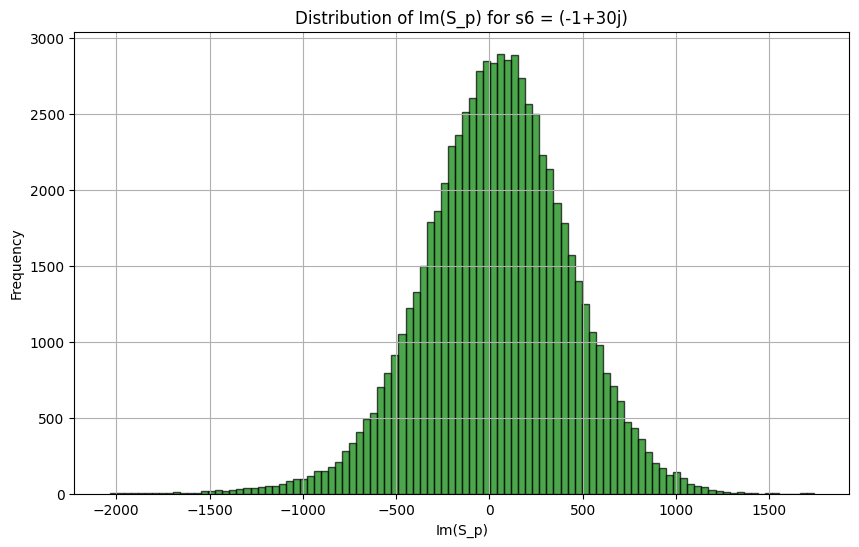

Mean of Im(S_p) for s6: 35.40593436640252
Standard deviation of Im(S_p) for s6: 390.1698516210173


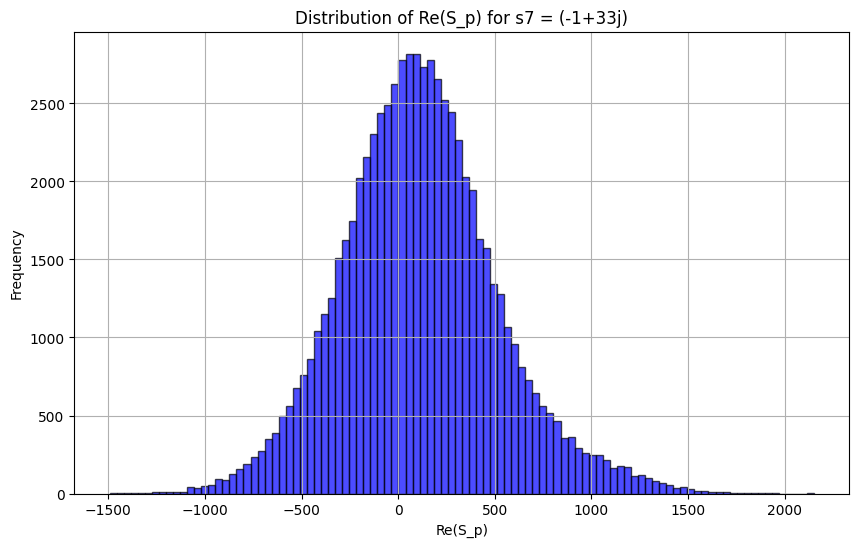

Mean of Re(S_p) for s7: 111.71430736717657
Standard deviation of Re(S_p) for s7: 404.7359888667627


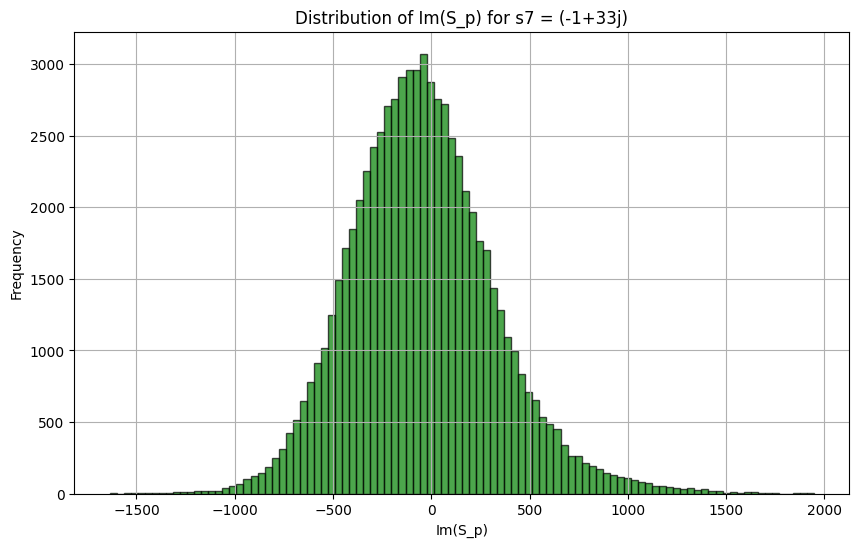

Mean of Im(S_p) for s7: -45.209578446665176
Standard deviation of Im(S_p) for s7: 368.53897171733723


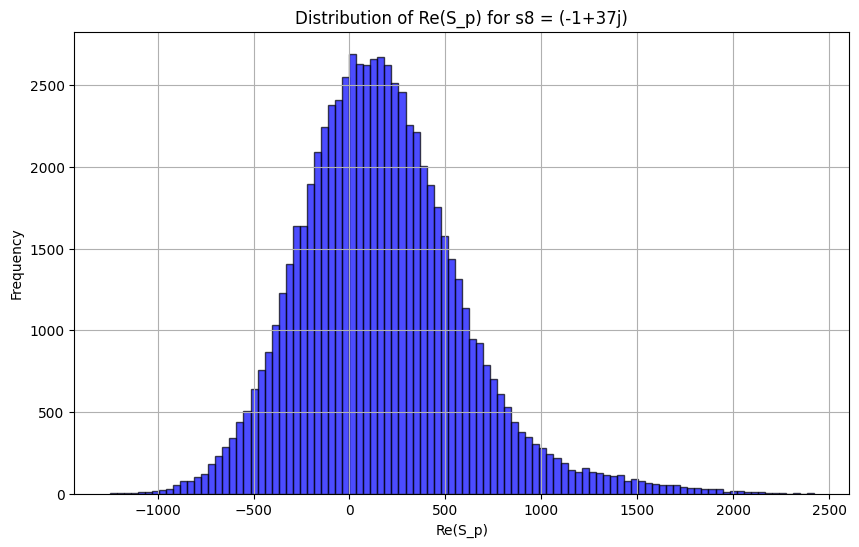

Mean of Re(S_p) for s8: 166.68668464892423
Standard deviation of Re(S_p) for s8: 424.8862429848082


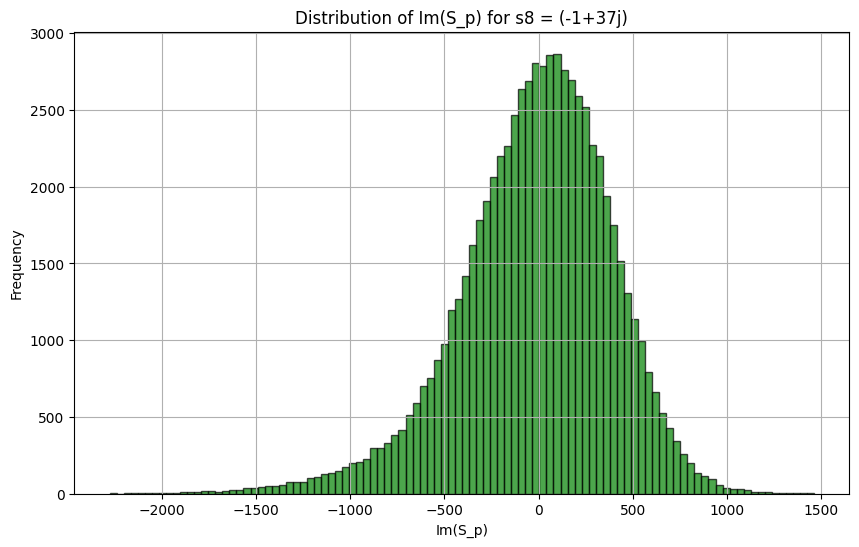

Mean of Im(S_p) for s8: -19.97092011827572
Standard deviation of Im(S_p) for s8: 405.5516044045105


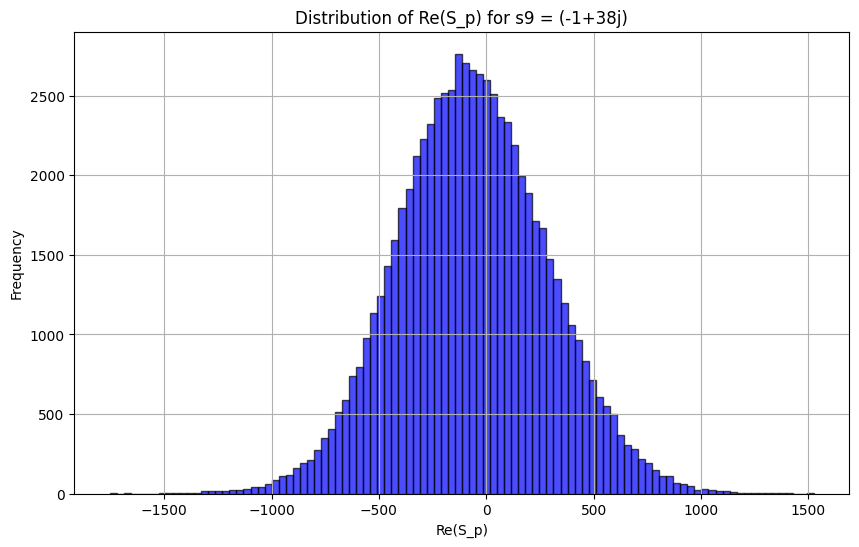

Mean of Re(S_p) for s9: -66.43515978937712
Standard deviation of Re(S_p) for s9: 349.2841040922345


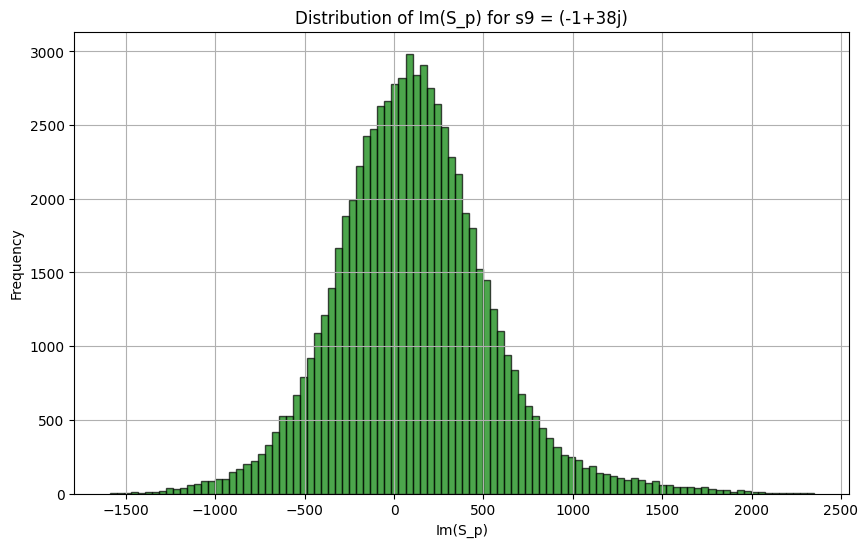

Mean of Im(S_p) for s9: 107.63994179428046
Standard deviation of Im(S_p) for s9: 434.26917954680795


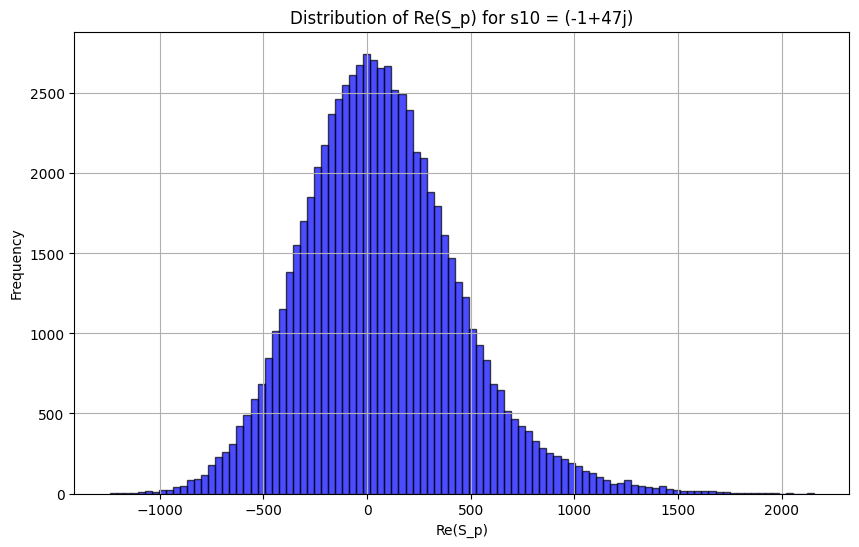

Mean of Re(S_p) for s10: 70.98876580233403
Standard deviation of Re(S_p) for s10: 378.48022302210535


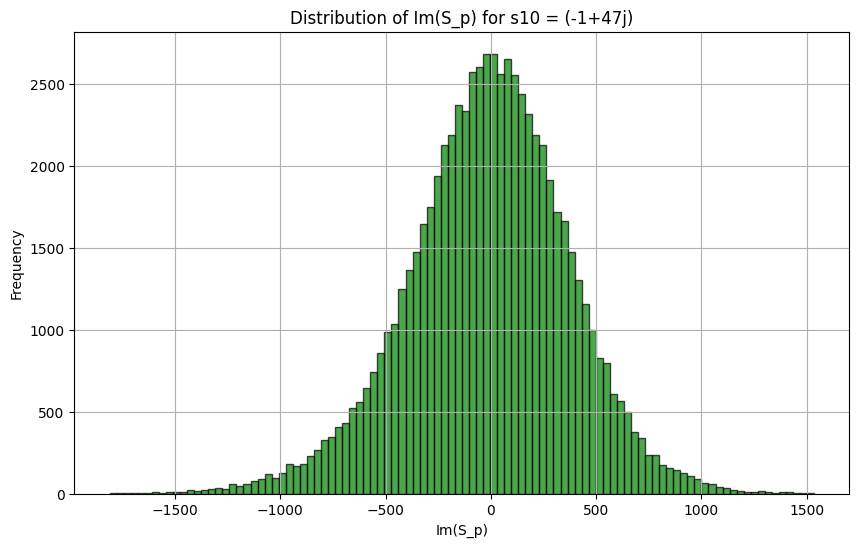

Mean of Im(S_p) for s10: -13.750674472122471
Standard deviation of Im(S_p) for s10: 382.44755544075144


In [3]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol
import random

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
real_part = float(input("Enter the real part of s: "))  # User input for the real part of s
K = 100

# Generate 10 different s-values with imaginary parts between 0 and 50
imaginary_parts = random.sample(range(1, 51), 9)  # Pick 9 unique random integers between 1 and 50
imaginary_parts.append(0)  # Ensure one value is 0
imaginary_parts.sort()  # Sort in increasing order

s_values = [complex(real_part, imag) for imag in imaginary_parts]

print("Generated s-values (sorted by increasing imaginary part):")
for idx, s in enumerate(s_values, start=1):
    print(f"s{idx} = {s}")

# Generate all primes in the range [X, 2X]
all_primes = list(sympy.primerange(X, 2 * X))
num_primes = len(all_primes)

if num_primes == 0:
    print(f"No primes found in the range [{X}, {2 * X}].")
    exit()

print(f"Number of primes in the range [{X}, {2 * X}]: {num_primes}")

# Functions to compute Re(S_p) and Im(S_p) for a given s
def compute_S_p_parts(s):
    S_real = []  # Store the real part of S_p for each p
    S_imag = []  # Store the imaginary part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        S_imag_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
                S_imag_p += legendre * magnitude * np.sin(theta)  # Imaginary part: sum of sines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        S_real.append(S_real_p)
        S_imag.append(S_imag_p)

    # Ensure all elements in S_real and S_imag are floats
    S_real_float = []
    S_imag_float = []
    for val in S_real:
        try:
            S_real_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value in Re(S_p): {val}")

    for val in S_imag:
        try:
            S_imag_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value in Im(S_p): {val}")

    # Convert to NumPy arrays for further processing
    S_real_float = np.array(S_real_float)
    S_imag_float = np.array(S_imag_float)

    # Filter out invalid (non-finite) values
    finite_S_real = S_real_float[np.isfinite(S_real_float)]
    finite_S_imag = S_imag_float[np.isfinite(S_imag_float)]

    return finite_S_real, finite_S_imag

# Compute S_p and plot for each s value
for idx, s in enumerate(s_values, start=1):
    finite_S_real, finite_S_imag = compute_S_p_parts(s)

    if len(finite_S_real) == 0 and len(finite_S_imag) == 0:
        print(f"No valid data to plot for s{idx} = {s}.")
        continue

    # Plot histogram of the real part of S_p for the current s
    if len(finite_S_real) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Re(S_p) for s{idx} = {s}")
        plt.xlabel("Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Re(S_p) for s{idx}: {mean_real}")
        print(f"Standard deviation of Re(S_p) for s{idx}: {std_real}")

    # Plot histogram of the imaginary part of S_p for the current s
    if len(finite_S_imag) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_imag, bins=100, color='green', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Im(S_p) for s{idx} = {s}")
        plt.xlabel("Im(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_imag = np.mean(finite_S_imag)
        std_imag = np.std(finite_S_imag)
        print(f"Mean of Im(S_p) for s{idx}: {mean_imag}")
        print(f"Standard deviation of Im(S_p) for s{idx}: {std_imag}")


Enter a large value for X: 3000000
Enter the real part of s: -1
Generated s-values (sorted by increasing imaginary part):
s1 = (-1+0j)
s2 = (-1+13j)
s3 = (-1+14j)
s4 = (-1+16j)
s5 = (-1+22j)
s6 = (-1+27j)
s7 = (-1+32j)
s8 = (-1+33j)
s9 = (-1+42j)
s10 = (-1+48j)
Number of primes in the range [3000000, 6000000]: 196033


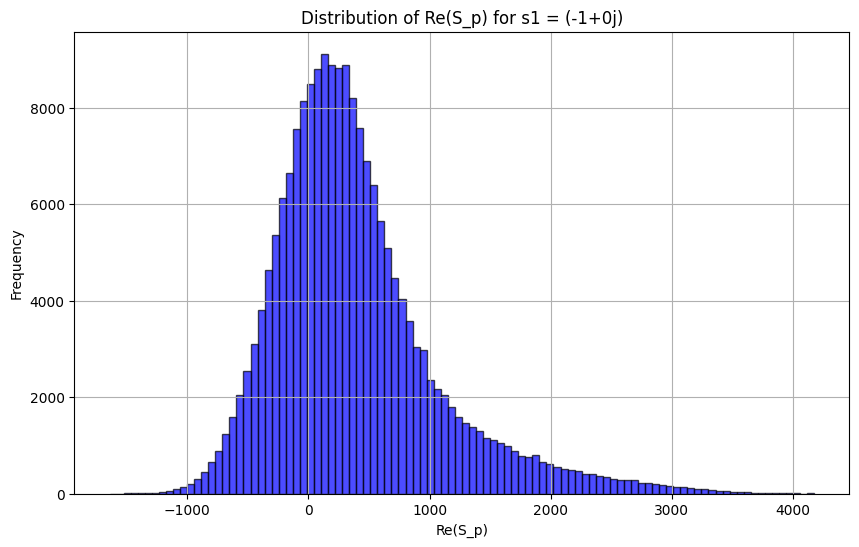

Mean of Re(S_p) for s1: 384.1650640453393
Standard deviation of Re(S_p) for s1: 683.4579152392917


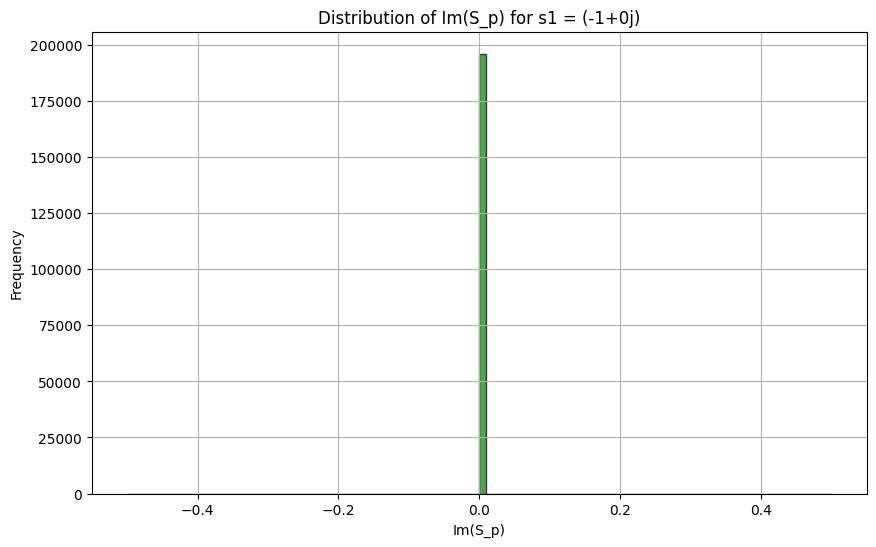

Mean of Im(S_p) for s1: 0.0
Standard deviation of Im(S_p) for s1: 0.0


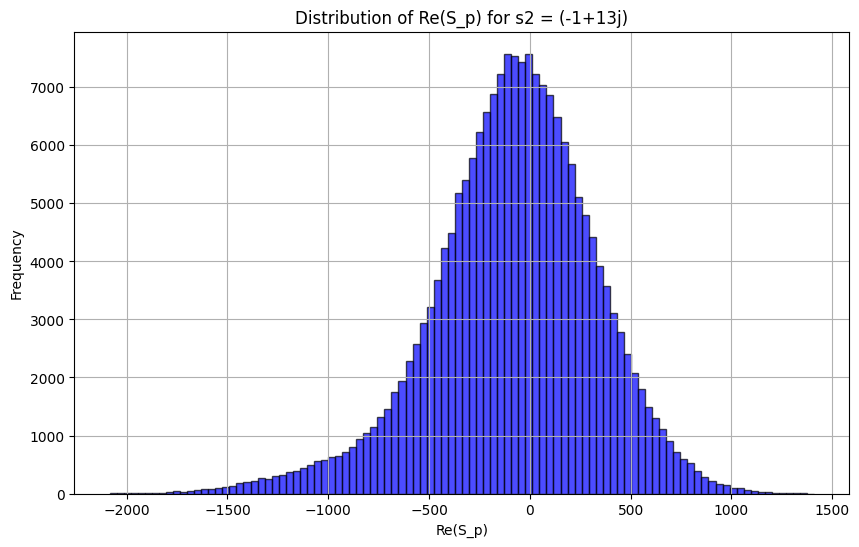

Mean of Re(S_p) for s2: -85.25247688243498
Standard deviation of Re(S_p) for s2: 407.96521104240827


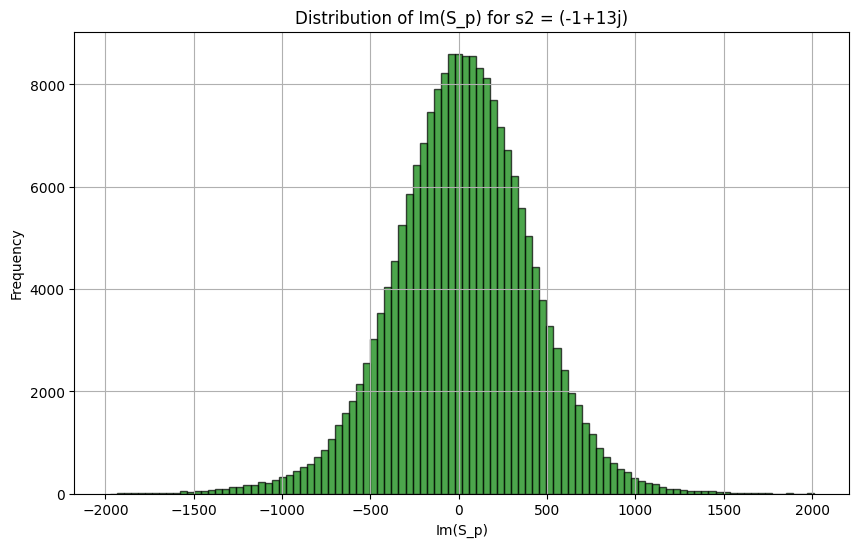

Mean of Im(S_p) for s2: 20.8035855649253
Standard deviation of Im(S_p) for s2: 388.1878223130371


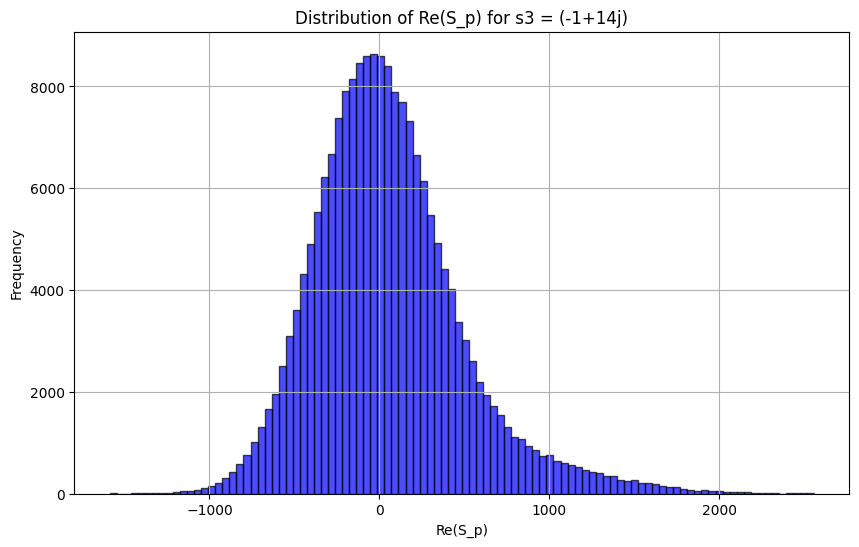

Mean of Re(S_p) for s3: 49.89451816861306
Standard deviation of Re(S_p) for s3: 441.32934560137016


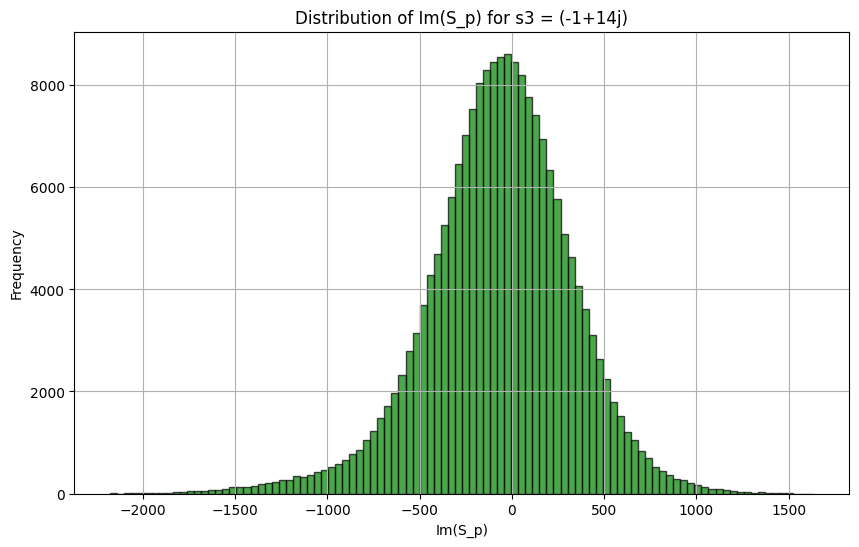

Mean of Im(S_p) for s3: -71.39018997196145
Standard deviation of Im(S_p) for s3: 392.7403454699687


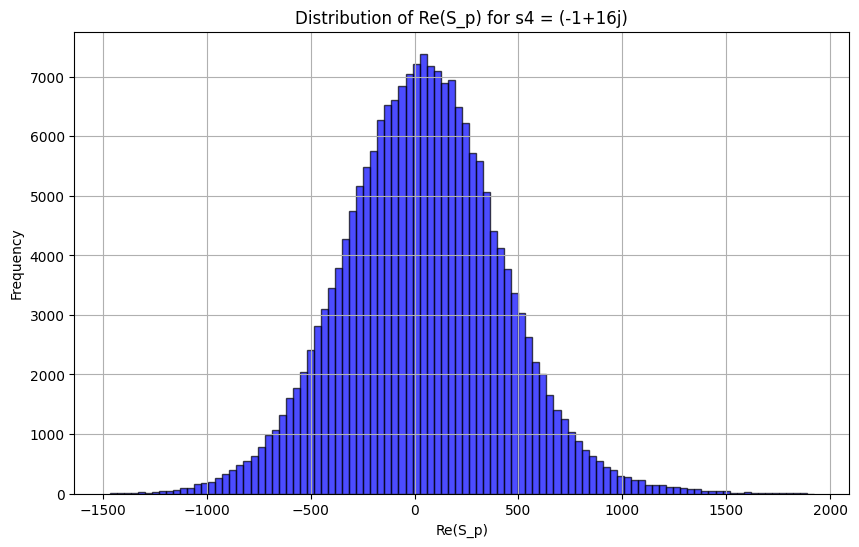

Mean of Re(S_p) for s4: 41.24445490709725
Standard deviation of Re(S_p) for s4: 381.16357551303304


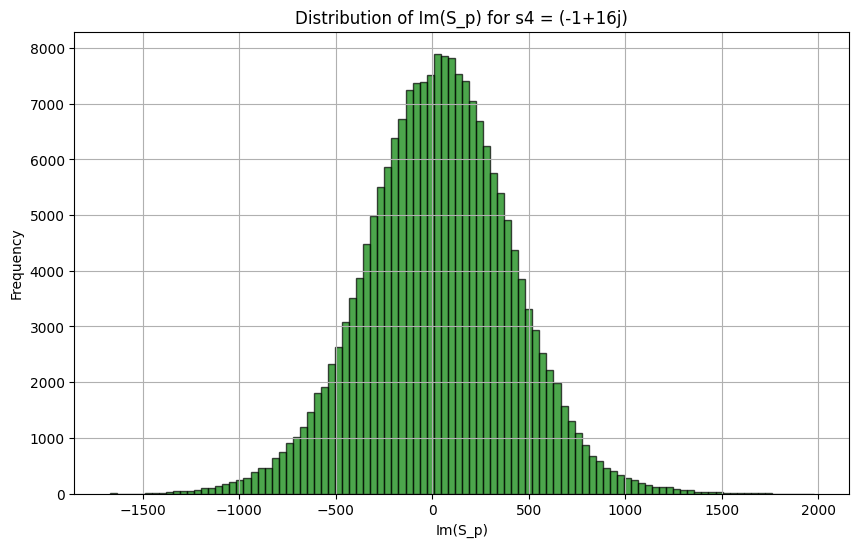

Mean of Im(S_p) for s4: 35.24563935995482
Standard deviation of Im(S_p) for s4: 379.56210194090124


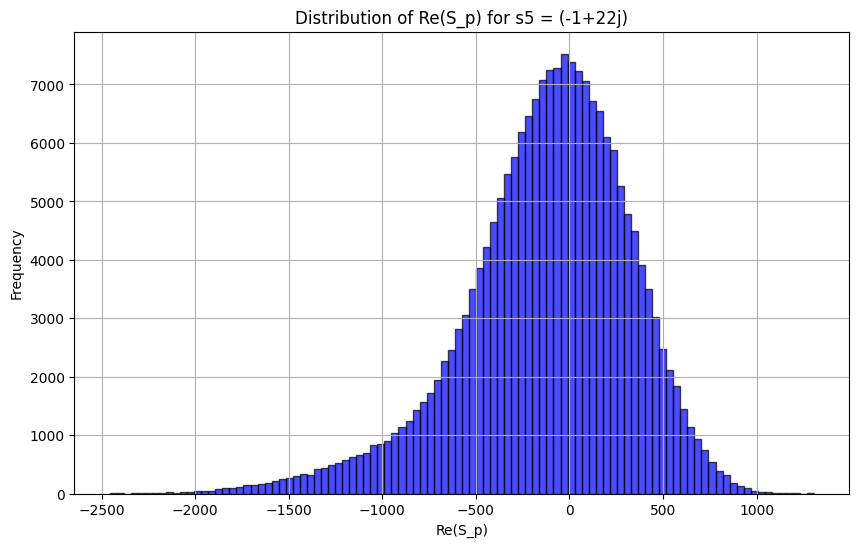

Mean of Re(S_p) for s5: -125.75028141700167
Standard deviation of Re(S_p) for s5: 449.84990033389386


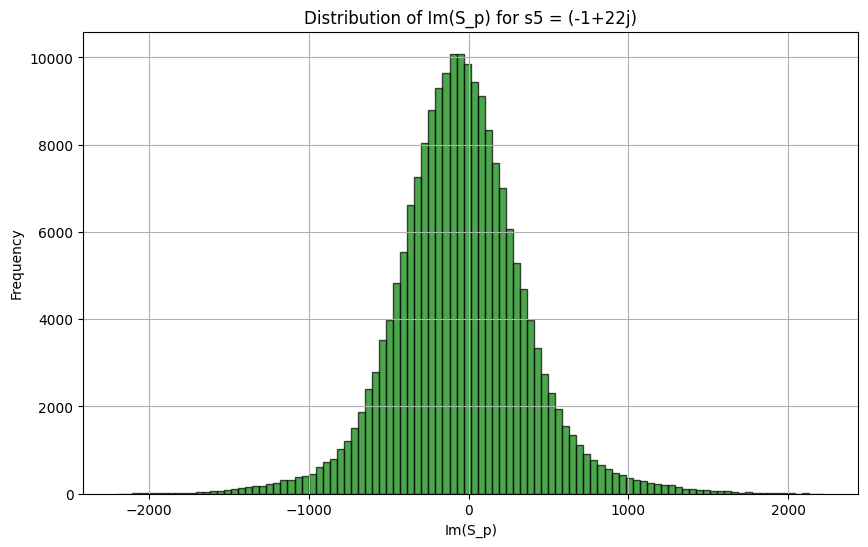

Mean of Im(S_p) for s5: -51.40431373903202
Standard deviation of Im(S_p) for s5: 403.61605392000047


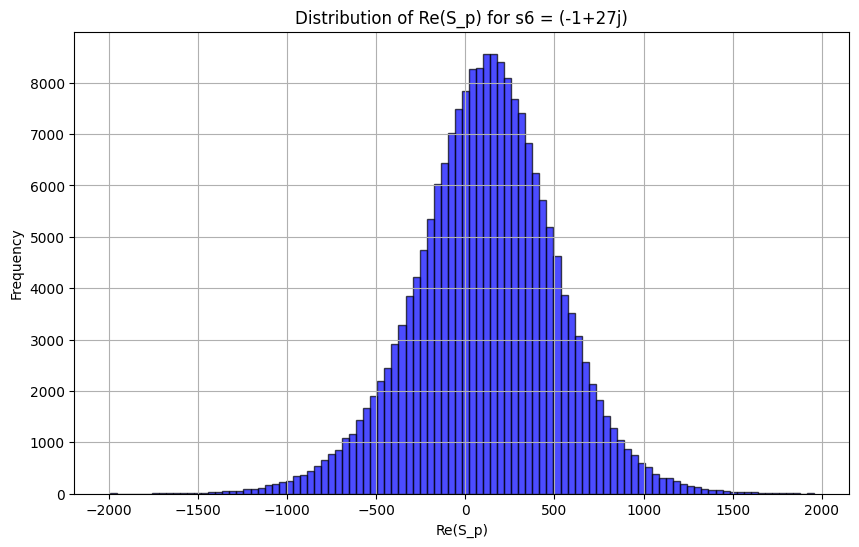

Mean of Re(S_p) for s6: 114.79813610375498
Standard deviation of Re(S_p) for s6: 396.66468550053384


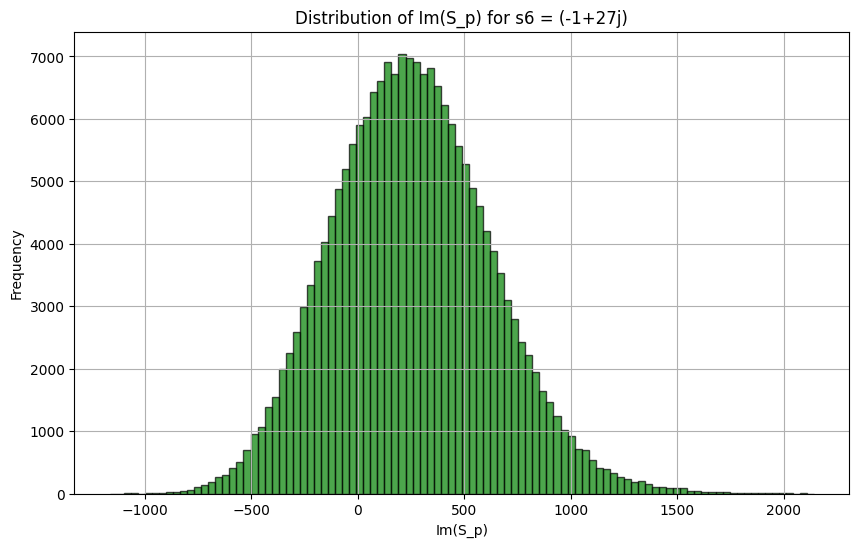

Mean of Im(S_p) for s6: 252.35767381254843
Standard deviation of Im(S_p) for s6: 372.46430835383023


In [ ]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy.functions.combinatorial.numbers import legendre_symbol
import random

# Define parameters
X = int(input("Enter a large value for X: "))  # User input for X
real_part = float(input("Enter the real part of s: "))  # User input for the real part of s
K = 100

# Generate 10 different s-values with imaginary parts between 0 and 50
imaginary_parts = random.sample(range(1, 51), 9)  # Pick 9 unique random integers between 1 and 50
imaginary_parts.append(0)  # Ensure one value is 0
imaginary_parts.sort()  # Sort in increasing order

s_values = [complex(real_part, imag) for imag in imaginary_parts]

print("Generated s-values (sorted by increasing imaginary part):")
for idx, s in enumerate(s_values, start=1):
    print(f"s{idx} = {s}")

# Generate all primes in the range [X, 2X]
all_primes = list(sympy.primerange(X, 2 * X))
num_primes = len(all_primes)

if num_primes == 0:
    print(f"No primes found in the range [{X}, {2 * X}].")
    exit()

print(f"Number of primes in the range [{X}, {2 * X}]: {num_primes}")

# Functions to compute Re(S_p) and Im(S_p) for a given s
def compute_S_p_parts(s):
    S_real = []  # Store the real part of S_p for each p
    S_imag = []  # Store the imaginary part of S_p for each p

    for p in all_primes:
        S_real_p = 0
        S_imag_p = 0
        for k in range(1, K + 1):
            try:
                legendre = legendre_symbol(k, p)
                theta = -s.imag * np.log(k)  # Extract the imaginary part of s
                magnitude = k ** (-s.real)  # Extract the real part of s
                S_real_p += legendre * magnitude * np.cos(theta)  # Real part: sum of cosines
                S_imag_p += legendre * magnitude * np.sin(theta)  # Imaginary part: sum of sines
            except Exception as e:
                print(f"Error at p={p}, k={k}: {e}")
                continue
        S_real.append(S_real_p)
        S_imag.append(S_imag_p)

    # Ensure all elements in S_real and S_imag are floats
    S_real_float = []
    S_imag_float = []
    for val in S_real:
        try:
            S_real_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value in Re(S_p): {val}")

    for val in S_imag:
        try:
            S_imag_float.append(float(val))
        except (TypeError, ValueError):
            print(f"Skipping non-numeric value in Im(S_p): {val}")

    # Convert to NumPy arrays for further processing
    S_real_float = np.array(S_real_float)
    S_imag_float = np.array(S_imag_float)

    # Filter out invalid (non-finite) values
    finite_S_real = S_real_float[np.isfinite(S_real_float)]
    finite_S_imag = S_imag_float[np.isfinite(S_imag_float)]

    return finite_S_real, finite_S_imag

# Compute S_p and plot for each s value
for idx, s in enumerate(s_values, start=1):
    finite_S_real, finite_S_imag = compute_S_p_parts(s)

    if len(finite_S_real) == 0 and len(finite_S_imag) == 0:
        print(f"No valid data to plot for s{idx} = {s}.")
        continue

    # Plot histogram of the real part of S_p for the current s
    if len(finite_S_real) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_real, bins=100, color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Re(S_p) for s{idx} = {s}")
        plt.xlabel("Re(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_real = np.mean(finite_S_real)
        std_real = np.std(finite_S_real)
        print(f"Mean of Re(S_p) for s{idx}: {mean_real}")
        print(f"Standard deviation of Re(S_p) for s{idx}: {std_real}")

    # Plot histogram of the imaginary part of S_p for the current s
    if len(finite_S_imag) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(finite_S_imag, bins=100, color='green', alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of Im(S_p) for s{idx} = {s}")
        plt.xlabel("Im(S_p)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Basic statistical analysis
        mean_imag = np.mean(finite_S_imag)
        std_imag = np.std(finite_S_imag)
        print(f"Mean of Im(S_p) for s{idx}: {mean_imag}")
        print(f"Standard deviation of Im(S_p) for s{idx}: {std_imag}")
